# Tarea clasificadores
## Profesora: Claudia Chávez
### Alumno: Cristóbal Saldías 
A continuación se procede a aplicar 4 modelos de clasificación (con algunas variaciones de funciones para los que aplicara) para la clasificación de tipo de pobreza de acuerdo a la encuesta CASEN - 2017. Los modelos empleados fueron:
- Regresión logística multinomial
- Naïve Bayes Gaussiano y Multinomial
- Árbol de clasificador multiclase
- SVC (Suppor Vector Classifier) de kernel polinómico, radial (RBF) y sigmoide <br>

_(Particularmente, para todos los modelos se trabajó con una proporción 80-20 respecto a datos de entrenamiento y de testing)_

La idea de usar varios modelos, es poder ir comparando cada uno y observar al final, cual es el mejor clasificador para la variable deseada. Se emplearon multiclases, puesto que las respuestas posibles a la variable son 3:
- No pobres
- Pobres extremos
- Pobres no extremos <br>

Para facilitar la codificación, se decidió asignar identificadores numéricos a cada una de las opciones, por lo que queda de la siguiente forma:
- No pobres: 0
- Pobres extremos: 1
- Pobres no extremos: 2 <br>

La forma en que se realizó el trabajo fue la siguiente:<br>
__1) Se realizó la resepectiva imputación de valores correspondiente a la fuente de información__<br>
__2) Se expuso mediante diferentes gráficos la distribución y características de relevantes de cada variable con la que se trabajó__<br>
__3) Se crearon las variables dummies para aquellas columnas de tipo categóricas y se exportó el dataset para trabajarlo de forma independiente en cada modelo de clasificador desarrollado__<br>
__4) Se aplicó el modelo clasificador de Regresión Logísica Multinomial__<br>
__5) Se aplicó el modelo de Naïve Bayes Multiclase__<br>
__6) Se aplicó el modelo de Árbol de desición Multiclase__<br>
__7) Se aplicaron los modelos SVC Multiclase para un kernel polinómico, radial y sigmoide__<br>
__8) Se analizaron los porcentajes de precisión de cada uno de los modelos y se evaluó cual resultó ser el más preciso__<br><br>


<hr>

# EDA
Primero, se realiza la imputación de valores nulos para las diferentes columnas que los posean. Después se revisa la presencia de outliers en las variables de tipo numéricas mediante gráficos de Boxplot.

### Columnas
Las columnas extraídas desde el archivo de la encuesta CASEN 2017 fueron:
- sexo
- edad
- ecivil (estado civil)
- o1 (empleado, si trabajó la semana pasada)
- oficio1 (ocupación u oficio)
- o16 (tipo de contrato)
- s12 (sistema previsional de salud)
- ytot (ingreso total)
- pobreza (situación de pobreza por ingresos)
- esc (años de escolaridad)
- educ (nivel educacional)
- depen (dependencia administrativa)
- activ (condicion de actividad económica)
- indmat (indicador de materialidad)
- indsan (indicador de saneamiento)
- calglobviv (calidad global de la vivienda)
- hacinamiento

In [1]:
# Librerias necesarias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("CASEN_2017_select.csv", encoding = 'latin-1')
df.head()

folio    sexo  edad  \
0  110110020201   Mujer    56   
1  110110020301   Mujer    21   
2  110110020401  Hombre    24   
3  110110020401  Hombre    28   
4  110110020501  Hombre    26   

                                            ecivil  o1  \
0                                       Soltero(a)  Sí   
1                                       Soltero(a)  Sí   
2  Conviviente o pareja sin acuerdo de unión civil  Sí   
3  Conviviente o pareja sin acuerdo de unión civil  Sí   
4                                        Casado(a)  No   

                                             oficio1               o16  \
0                         Trabajadores no calificado               NaN   
1                         Trabajadores no calificado        Plazo fijo   
2  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
3  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
4                         Trabajadores no calificado  Plazo indefinido   

                              s12      ytot    pobreza   esc  \
0                         No sabe  250000.0  No pobres  12.0   
1            Ninguno (Particular)  211091.0  No pobres   7.0   
2                         No sabe  281750.0  No pobres  12.0   
3                         No sabe  311750.0  No pobres  12.0   
4  Sistema Público FONASA Grupo B  341667.0  No pobres  15.0   

                              educ depen     activ              indmat  \
0                 M. Hum. Completa   NaN  Ocupados  Vivienda Aceptable   
1                    Básica Incom.   NaN  Ocupados  Vivienda Aceptable   
2                 M. Hum. Completa   NaN  Ocupados  Vivienda Aceptable   
3                 M. Hum. Completa   NaN  Ocupados  Vivienda Aceptable   
4  Técnico Nivel Superior Completo   NaN  Ocupados  Vivienda Aceptable   

        indsan   calglobviv                     hacinamiento  
0  Deficitario  Recuperable  Sin hacinamiento (2,49 y menos)  
1    Aceptable    Aceptable  Sin hacinamiento (2,49 y menos)  
2    Aceptable    Aceptable  Sin hacinamiento (2,49 y menos)  
3    Aceptable    Aceptable  Sin hacinamiento (2,49 y menos)  
4  Deficitario  Recuperable  Sin hacinamiento (2,49 y menos)

In [3]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(216439, 18)
Tipo de variable de las columnas:
folio             int64
sexo             object
edad              int64
ecivil           object
o1               object
oficio1          object
o16              object
s12              object
ytot            float64
pobreza          object
esc             float64
educ             object
depen            object
activ            object
indmat           object
indsan           object
calglobviv       object
hacinamiento     object
dtype: object
Cantidad de valores nulos por columna:
folio                0
sexo                 0
edad                 0
ecivil               0
o1               41363
oficio1         124022
o16             147809
s12                  0
ytot             71733
pobreza            208
esc              42381
educ                 0
depen           158317
activ            41363
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64


## Cantidad de valores nulos respecto a no nulos

In [4]:
# Funcion para obtener la cantida de datos no nulos por cada columna
def NoNulos(campo):
    n = df.shape[0]
    nulos = df[campo].isnull().sum()
    return n - nulos

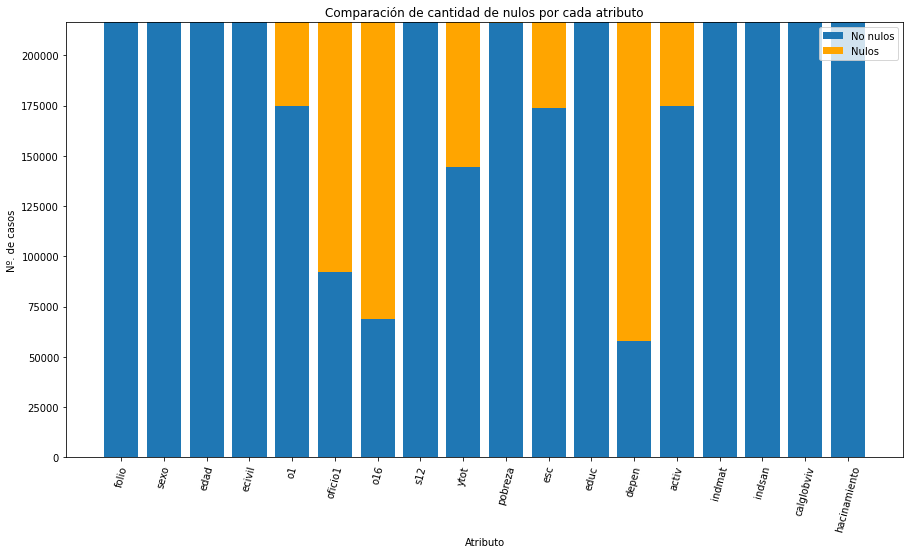

In [5]:
total_registros = df.shape[0]
data = [
    ["folio", df["folio"].isnull().sum(), NoNulos("folio")],
    ["sexo", df["sexo"].isnull().sum(), NoNulos("sexo")],
    ["edad", df["edad"].isnull().sum(), NoNulos("edad")],
    ["ecivil", df["ecivil"].isnull().sum(), NoNulos("ecivil")],
    ["o1", df["o1"].isnull().sum(), NoNulos("o1")],
    ["oficio1", df["oficio1"].isnull().sum(), NoNulos("oficio1")],
    ["o16", df["o16"].isnull().sum(), NoNulos("o16")],
    ["s12", df["s12"].isnull().sum(), NoNulos("s12")],
    ["ytot", df["ytot"].isnull().sum(), NoNulos("ytot")],
    ["pobreza", df["pobreza"].isnull().sum(), NoNulos("pobreza")],
    ["esc", df["esc"].isnull().sum(), NoNulos("esc")],
    ["educ", df["educ"].isnull().sum(), NoNulos("educ")],
    ["depen", df["depen"].isnull().sum(), NoNulos("depen")],
    ["activ", df["activ"].isnull().sum(), NoNulos("activ")],
    ["indmat", df["indmat"].isnull().sum(), NoNulos("indmat")],
    ["indsan", df["indsan"].isnull().sum(), NoNulos("indsan")],
    ["calglobviv", df["calglobviv"].isnull().sum(), NoNulos("calglobviv")],
    ["hacinamiento", df["hacinamiento"].isnull().sum(), NoNulos("hacinamiento")]
]
df2 = pd.DataFrame(data, columns = ["attribute", "null_count", "notnull_count"])
df2 = df2.set_index("attribute")

null_values = df2["null_count"]
not_nullvalues = df2["notnull_count"]

plt.figure(figsize=(15,8))
plt.bar(df2.index, not_nullvalues, label='No nulos')
plt.bar(df2.index, null_values, color='orange', label='Nulos', bottom=not_nullvalues)
plt.xlabel('Atributo')
plt.xticks(rotation = 75)
plt.ylabel('Nº. de casos')
plt.title('Comparación de cantidad de nulos por cada atributo')
plt.legend(loc = "best")
plt.show()

# Imputación de valores nulos
A continuación se procede a la imputación de valores nulos por cada una de las variables que poseen dichos campos. Se imputa bajo las opciones de emplear el promedio o clasificar los valores nules bajo alguna categoría de "No sabe/No responde" o "No aplica".

<hr>

## Imputación de columna _empleado, si trabajó la semana pasada_ (o1)
- columna: o1
- tipo de variable: object
- cantidad de nulos: 41.363

La variable posee las categorías de "Sí" y "No", por lo que para estos valores nulos se crea una nueva columna con la categoría de "NS/NR" (No sabe/No responde) para alojar dichos valores. Se añade esta opción ya que no representan un "gran" volumen de informacion respecto al total de la muestra.

In [6]:
df["o1"].value_counts().sort_values(ascending = False)

Sí    89360
No    85716
Name: o1, dtype: int64

In [7]:
# Funcion de imputacion para o1
df.o1 = df.o1.fillna("NS/NR")
df["o1"].value_counts().sort_values(ascending = False)

Sí       89360
No       85716
NS/NR    41363
Name: o1, dtype: int64

In [8]:
df["o1"].isna().sum()

0

<hr>

## Imputacion de o16 (tipo de contrato)
- columna: o16
- tipo de variable: object
- cantidad de nulos: 147.809

Para esta variable, se va a aplicar una imputación bajo cierta lógica. Se va ha añadir una nueva opción de "No aplica" para aquella población que no puede ser contratada, en otras palabra todo menor de 16 años de acuerdo a la ley 21.271. Sólo sobre estos registros se aplica este nuevo criterio de "tipo de contrato".

In [9]:
df["o16"].value_counts().sort_values(ascending = False)

Plazo indefinido       47220
Plazo fijo             21164
No sabe/no responde      246
Name: o16, dtype: int64

In [10]:
# Se extrae una muestra para observar la cantidad de registros y si se pueden aplicar otras imputaciones
df_edad_m14 = df[df['edad'] < 16]
print("============================================")
print("Tamaño muestra: ", df_edad_m14.shape)
print("============================================")
print("Cantidad de nulos por variable:")
print(df_edad_m14.isna().sum())
print("============================================")

Tamaño muestra:  (44289, 18)
Cantidad de nulos por variable:
folio               0
sexo                0
edad                0
ecivil              0
o1                  0
oficio1         44257
o16             44264
s12                 0
ytot            32037
pobreza             5
esc             41368
educ                0
depen            7652
activ           41363
indmat              0
indsan              0
calglobviv          0
hacinamiento        0
dtype: int64


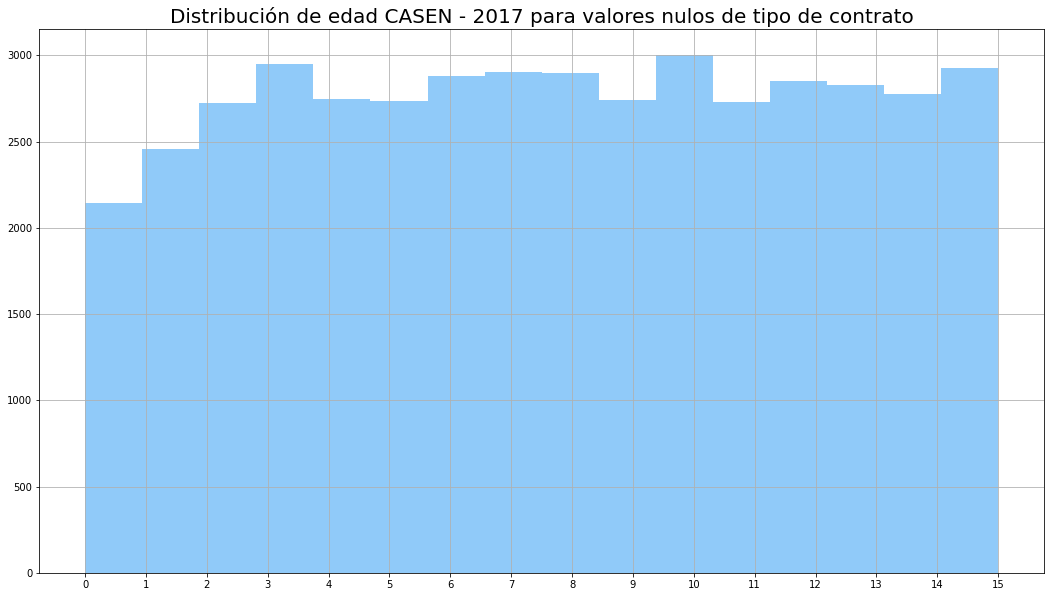

In [11]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df_edad_m14["edad"], facecolor = "#90CAF9", bins = 16)
plt.title("Distribución de edad CASEN - 2017 para valores nulos de tipo de contrato", fontsize = 20)
plt.xticks(np.arange(0, 16, 1))
plt.show()

Por ende, corresponden a poco más de 44.000 registros los que se imputan bajo esta categoría. Además, esta muestra puede ser clasificada como __población inactiva__ para efectos de la variable de condición de actividad económica __activ__.

In [12]:
df["activ"].value_counts().sort_values(ascending = False)

Ocupados       92417
Inactivos      74856
Desocupados     7803
Name: activ, dtype: int64

In [13]:
# imputacion para el tipo de contrato
def imputacion_o16(fila):
    if(fila["edad"] < 16):# si la edad es menor a 16 => se recategoriza
        return "No aplica"
    else:# si no, se deja tal cual
        return fila["o16"]
    
# imputacion para la condicion de actividad economica
def imputacion_activ(fila):
    if(fila["edad"] < 16):# si es menor de 16 es inactiva
        return "Inactivos"
    else:# sino se deja igual
        return fila["activ"]

# Imputacion sobre la variable del tipo de ocupacion
df["o16"] = df.apply(imputacion_o16, axis = 1)
df["activ"] = df.apply(imputacion_activ, axis = 1)

In [14]:
df["o16"].value_counts()

Plazo indefinido       47219
No aplica              44289
Plazo fijo             21140
No sabe/no responde      246
Name: o16, dtype: int64

In [15]:
df["activ"].value_counts()

Inactivos      116270
Ocupados        92385
Desocupados      7784
Name: activ, dtype: int64

<hr>

## Imputacion de esc (años de escolaridad)
- columna: esc
- tipo de variable: float64
- cantidad de nulos: 42.381

Al no ser un gran volumen de registros, se evalúa la posibilidad de imputar mediante el promedio o la mediana de acuerdo a un histograma de edad que se realiza.

In [16]:
df["esc"].describe()

count    174058.000000
mean         10.825771
std           4.293652
min           0.000000
25%           8.000000
50%          12.000000
75%          14.000000
max          22.000000
Name: esc, dtype: float64

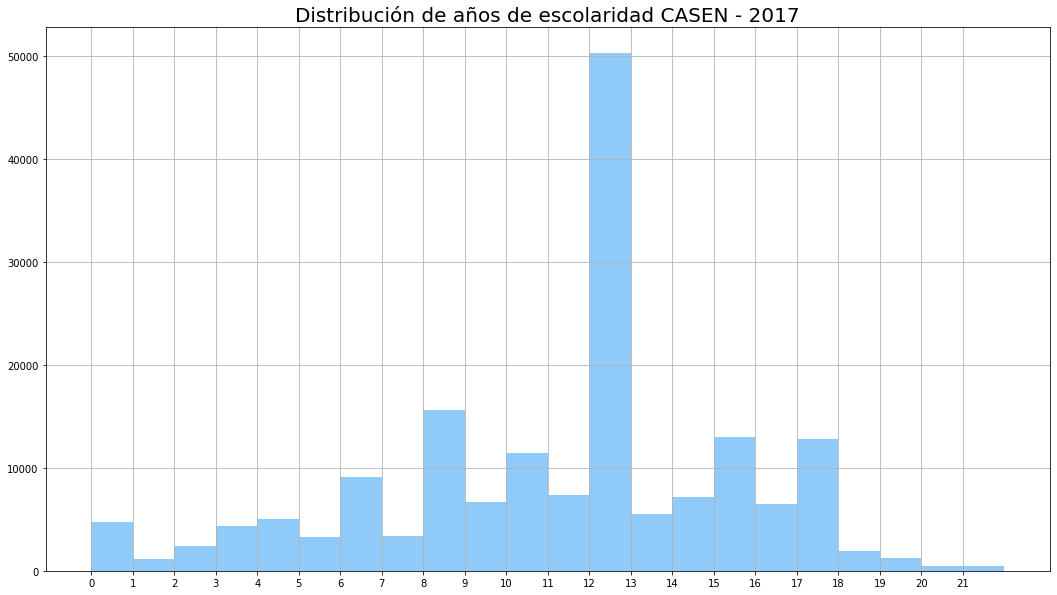

In [17]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df["esc"], facecolor = "#90CAF9", bins = 22)
plt.title("Distribución de años de escolaridad CASEN - 2017", fontsize = 20)
plt.xticks(np.arange(0, 22, 1))
plt.show()

Se puede apreciar que tiende a ser una distribución normal, por lo que se va a imputar en base al valor promedio que son 10 años de escolaridad. Posterior a ésto, la variable se convierte a una de tipo "entero" (int64) para que sea coherente con los registros que posee.

In [18]:
# aplicacion de la imputacion
df["esc"] = df["esc"].fillna(10)
# se convierte el tipo de variable a la que corresponde
df["esc"] = df["esc"].astype("int64")

In [19]:
df.isna().sum()

folio                0
sexo                 0
edad                 0
ecivil               0
o1                   0
oficio1         124022
o16             103545
s12                  0
ytot             71733
pobreza            208
esc                  0
educ                 0
depen           158317
activ                0
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64

<hr>

## Imputación de ytot (ingreso total)
- columna: ytot
- tipo de variable: float64
- cantidad de nulos: 71.733

Al igual que los años de escolaridad, de acuerdo a un histograma se evalúa la posibilidad de imputar los registros con el promedio o la mediana, de acuerdo al volumen de datos más representativo. 

In [20]:
# Se muestran los registros sin notacion cientifica
round(df["ytot"].describe(), 2)

count      144706.00
mean       403988.01
std        783814.51
min            83.00
25%        108330.00
50%        270000.00
75%        450000.00
max      84700000.00
Name: ytot, dtype: float64

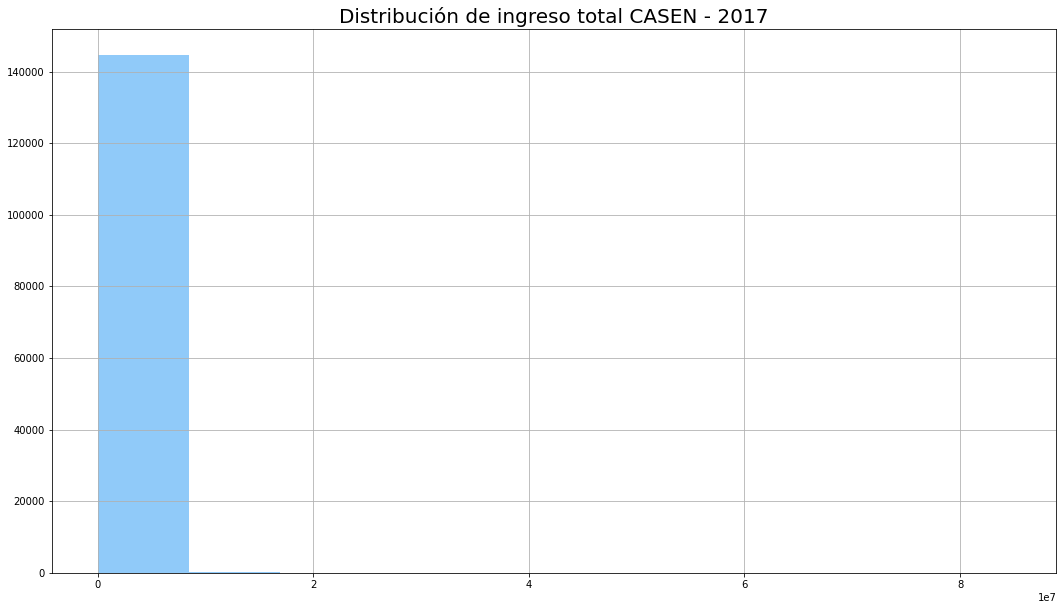

In [21]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df["ytot"], facecolor = "#90CAF9")
plt.title("Distribución de ingreso total CASEN - 2017", fontsize = 20)
plt.show()

De acuerdo al análisis de registros, se puede apreciar que hay un gran volumen de datos en los primeros 3 cuartiles del total de información. Emplear la mediana o el promedio para imputar los valores nulos, puede no resultar totalmente representativo, por lo que se van a eliminar todos los registros nulos y se convierte la variable a tipo entero (int64).

In [22]:
# Eliminacion de registros nulos
df = df[df['ytot'].notna()]
df["ytot"] = df["ytot"].astype("int64")
print("==============================================")
print("Cantidad de nulos:")
print(df.isna().sum())
print("==============================================")
print("Tamaño dataset: ", df.shape)
print("==============================================")

Cantidad de nulos:
folio                0
sexo                 0
edad                 0
ecivil               0
o1                   0
oficio1          57692
o16              67593
s12                  0
ytot                 0
pobreza            196
esc                  0
educ                 0
depen           126450
activ                0
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64
Tamaño dataset:  (144706, 18)


## Imputación de la variable depen (dependencia administrativa)

- variable: depen
- tipo de variable: object
- cantidad de nulos: 126.450

Se puede apreciar que la cantidad de registros nulos de la variable _depen_ corresponden al __87.38%__ del total de datos disponibles. Imputar ese importante volumen de registros puede resultar no apropiado, independiente que exista una opción de "NS/NR" (No sabe/No responde). Imputar todo este volumen de registros bajo esa categoría puede repercutir en que el modelo clasificador, no sea preciso. <br>
Ante esto, se decide __eliminar__ esta variable del dataset.

In [23]:
df["depen"].value_counts()

Municipal                                           6606
Particular Subvencionado                            5058
Universidad Privada                                 1547
Universidad del Cruch                               1504
Instituto Profesional                               1376
Junji                                                625
Centro de Formación Técnica                          566
Integra                                              317
Particular Pagado                                    313
Corporación de Administración Delegada (DL 3166)     176
NS/NR                                                164
Otra dependencia                                       4
Name: depen, dtype: int64

In [24]:
del df["depen"]

In [25]:
df.isna().sum()

folio               0
sexo                0
edad                0
ecivil              0
o1                  0
oficio1         57692
o16             67593
s12                 0
ytot                0
pobreza           196
esc                 0
educ                0
activ               0
indmat              0
indsan              0
calglobviv          0
hacinamiento        0
dtype: int64

<hr>

## Imputación de variables restantes
Las variables independientes restantes con valores nulos corresponde a oficio1 (ocupación u oficio), y o16 (tipo de contrato). Se eliminan de la fuente de información para evitar posibles fallos.

In [26]:
df = df.dropna()
df.shape

(64689, 17)

<hr>

## Variable "folio"
La variable folio, corresponde a una identificación asociada al registro de la encuesta CASEN, por lo que no aporta ningún valor o información al futuro modelo, por lo cual, esta variable se elimina del set de datos.

In [27]:
del df["folio"]

In [28]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(64689, 16)
Tipo de variable de las columnas:
sexo            object
edad             int64
ecivil          object
o1              object
oficio1         object
o16             object
s12             object
ytot             int64
pobreza         object
esc              int64
educ            object
activ           object
indmat          object
indsan          object
calglobviv      object
hacinamiento    object
dtype: object
Cantidad de valores nulos por columna:
sexo            0
edad            0
ecivil          0
o1              0
oficio1         0
o16             0
s12             0
ytot            0
pobreza         0
esc             0
educ            0
activ           0
indmat          0
indsan          0
calglobviv      0
hacinamiento    0
dtype: int64


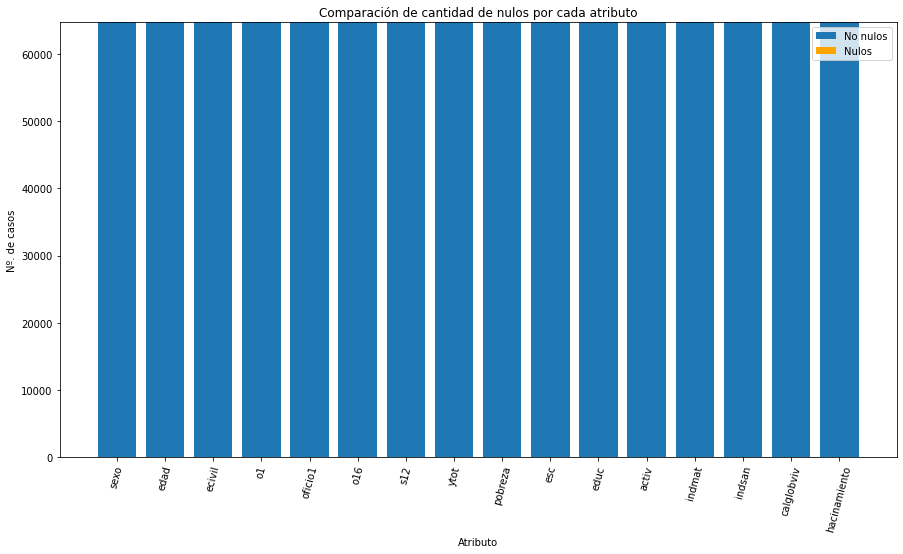

In [107]:
total_registros = df.shape[0]
data = [
    ["sexo", df["sexo"].isnull().sum(), NoNulos("sexo")],
    ["edad", df["edad"].isnull().sum(), NoNulos("edad")],
    ["ecivil", df["ecivil"].isnull().sum(), NoNulos("ecivil")],
    ["o1", df["o1"].isnull().sum(), NoNulos("o1")],
    ["oficio1", df["oficio1"].isnull().sum(), NoNulos("oficio1")],
    ["o16", df["o16"].isnull().sum(), NoNulos("o16")],
    ["s12", df["s12"].isnull().sum(), NoNulos("s12")],
    ["ytot", df["ytot"].isnull().sum(), NoNulos("ytot")],
    ["pobreza", df["pobreza"].isnull().sum(), NoNulos("pobreza")],
    ["esc", df["esc"].isnull().sum(), NoNulos("esc")],
    ["educ", df["educ"].isnull().sum(), NoNulos("educ")],
    ["activ", df["activ"].isnull().sum(), NoNulos("activ")],
    ["indmat", df["indmat"].isnull().sum(), NoNulos("indmat")],
    ["indsan", df["indsan"].isnull().sum(), NoNulos("indsan")],
    ["calglobviv", df["calglobviv"].isnull().sum(), NoNulos("calglobviv")],
    ["hacinamiento", df["hacinamiento"].isnull().sum(), NoNulos("hacinamiento")]
]
df2 = pd.DataFrame(data, columns = ["attribute", "null_count", "notnull_count"])
df2 = df2.set_index("attribute")

null_values = df2["null_count"]
not_nullvalues = df2["notnull_count"]

plt.figure(figsize=(15,8))
plt.bar(df2.index, not_nullvalues, label='No nulos')
plt.bar(df2.index, null_values, color='orange', label='Nulos', bottom=not_nullvalues)
plt.xlabel('Atributo')
plt.xticks(rotation = 75)
plt.ylabel('Nº. de casos')
plt.title('Comparación de cantidad de nulos por cada atributo')
plt.legend(loc = "best")
plt.show()

## Manipulación de la variable pobreza
Dado que la variable pobreza es de tipo categórica y es la que se desea predecir, para facilitar la manipulación y aplicación del modelo, ésta se va a convertir a "int64" con identificadores numéricos para los tipos de pobreza que registra la variable. Los identificadores quedan de la siguiente manera:
- No pobres: 0
- Pobres extremos: 1
- Pobres no extremos: 2

In [29]:
dfPobreza = df.groupby("pobreza").agg({
    "sexo": "count"
})
dfPobreza.columns = ["registros"]
dfPobreza

registros
pobreza                      
No pobres               62264
Pobres extremos           406
Pobres no extremos       2019

In [33]:
# Funcion de conversion
def conversion_pobreza(columna):
    if(columna == "No pobres"):
        return 0
    elif(columna == "Pobres extremos"):
        return 1
    else:
        return 2

df["pobreza_int"] = df["pobreza"].apply(conversion_pobreza)
df.head()

sexo  edad                                           ecivil  o1  \
1   Mujer    21                                       Soltero(a)  Sí   
2  Hombre    24  Conviviente o pareja sin acuerdo de unión civil  Sí   
3  Hombre    28  Conviviente o pareja sin acuerdo de unión civil  Sí   
4  Hombre    26                                        Casado(a)  No   
9   Mujer    59                                      Separado(a)  Sí   

                                             oficio1               o16  \
1                         Trabajadores no calificado        Plazo fijo   
2  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
3  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
4                         Trabajadores no calificado  Plazo indefinido   
9  Operadores de instalaciones y máquinas y monta...  Plazo indefinido   

                              s12    ytot    pobreza  esc  \
1            Ninguno (Particular)  211091  No pobres    7   
2                         No sabe  281750  No pobres   12   
3                         No sabe  311750  No pobres   12   
4  Sistema Público FONASA Grupo B  341667  No pobres   15   
9  Sistema Público FONASA Grupo D  595000  No pobres   12   

                              educ     activ              indmat       indsan  \
1                    Básica Incom.  Ocupados  Vivienda Aceptable    Aceptable   
2                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
3                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
4  Técnico Nivel Superior Completo  Ocupados  Vivienda Aceptable  Deficitario   
9                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   

    calglobviv                     hacinamiento  pobreza_int  
1    Aceptable  Sin hacinamiento (2,49 y menos)            0  
2    Aceptable  Sin hacinamiento (2,49 y menos)            0  
3    Aceptable  Sin hacinamiento (2,49 y menos)            0  
4  Recuperable  Sin hacinamiento (2,49 y menos)            0  
9    Aceptable  Sin hacinamiento (2,49 y menos)            0

In [34]:
df["pobreza_int"].value_counts()

0    62264
2     2019
1      406
Name: pobreza_int, dtype: int64

<hr>

# Revisión de valores outliers
A continuación, se revisa sobre aquellas variables que son de tipo numéricas, la presencia de valores outliers o anómalos, que puedan generar un posible desbalance en el modelo de clasificación. Las variables numéricas analizadas son:
- edad
- ytot
- esc <br>

Para esto se emplea un gráfico de Boxplot y su respectiva tabla de valores, el cual permite visualizar cuántos valores outliers hay y a partir de qué valores son anómalos.

<hr>

In [35]:
# Funcion para crear una tabla con los valores de BoxPlot
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['cota inferior'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['primer cuartil (25%)'] = bp['boxes'][i].get_ydata()[1]
        dict1['mediana (50%)'] = bp['medians'][i].get_ydata()[1]
        dict1['tercer cuartil (75%)'] = bp['boxes'][i].get_ydata()[2]
        dict1['cota superior'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

## Tabla con los valores de boxplot
La función anterior, permite obtener los valores que entrega el gráfico de Boxplot, el cual resulta ser ideal para detectar valores outliers o anómalos dentro de las variables numércias. Con la tabla se obtiene el valor de la cota inferior, primer cuartil (25%), la mediana (50%), tercer cuartil (75%) y la cota superior.
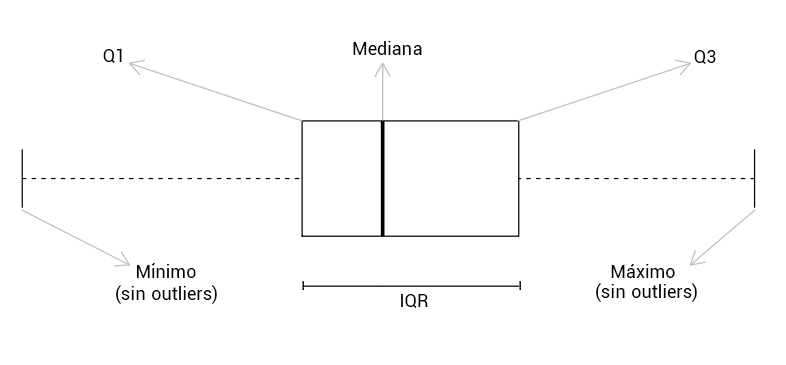

## Revisión variable ytot

In [36]:
# Se muestran los registros sin notacion cientifica
round(df["ytot"].describe(), 2)

count       64689.00
mean       588365.30
std        817165.15
min           183.00
25%        280000.00
50%        394352.00
75%        620418.00
max      72691664.00
Name: ytot, dtype: float64

### _Tabla y gráfico boxplot_

In [37]:
labels = ["ytot"]
bp = plt.boxplot([df['ytot']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  ytot          183.0              280000.0       394352.0   

   tercer cuartil (75%)  cota superior  
0              620418.0      1130833.0

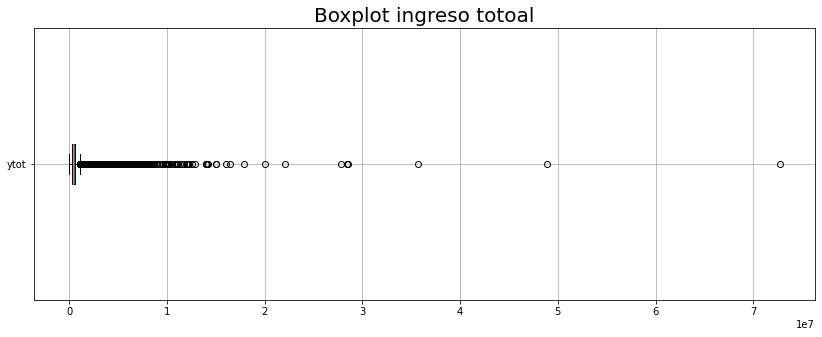

In [38]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso totoal", fontsize = 20)
plt.boxplot(df['ytot'], labels = ["ytot"], patch_artist=True, vert=False)
plt.show()

In [39]:
print("============================================================================")
print("Cantidad de valores outlier (valores de ingresos que exceden los 1.130.8330):")
print(df[(df["ytot"] > 1130833)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de ingresos que exceden los 1.130.8330):
6038


Se puede apreciar la presencia de un gran volumen de valores atípicos, por lo que se van a eliminar del set de datos para tener datos más homogéneos entre sí.

In [40]:
# Eliminacion de los registros
df = df.drop(df[df.ytot > 1130833].index)
df.shape

(58651, 17)

### _Primera revision de la persistencia de valores outliers_

In [41]:
labels = ["ytot"]
bp = plt.boxplot([df['ytot']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  ytot          183.0              275000.0       360000.0   

   tercer cuartil (75%)  cota superior  
0              523033.0       895000.0

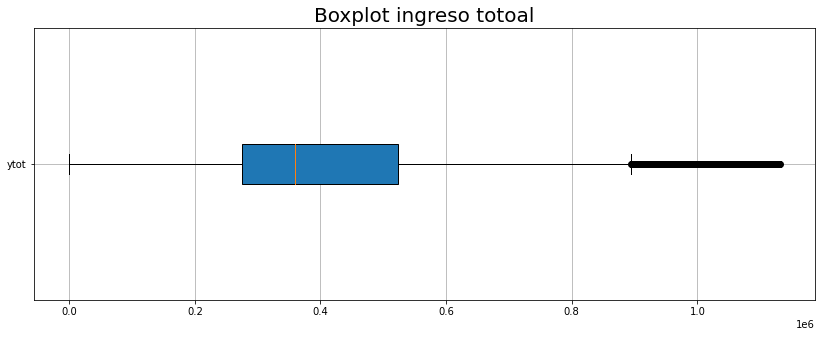

In [42]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso totoal", fontsize = 20)
plt.boxplot(df['ytot'], labels = ["ytot"], patch_artist=True, vert=False)
plt.show()

In [43]:
print("============================================================================")
print("Cantidad de valores outlier (valores de ingresos que exceden los 895.000):")
print(df[(df["ytot"] > 895000)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de ingresos que exceden los 895.000):
3269


Se aprecia que aún persiste la existencia de valores outliers que pueden generar un desvalance en el modelo. La cantidad de registros sigue siendo considerable, por lo que se eliminan del dataset.

In [44]:
# Eliminacion de los registros
df = df.drop(df[df.ytot > 895000].index)
df.shape

(55382, 17)

### _Segunda revisión de persistencia de valores outliers_

In [45]:
labels = ["ytot"]
bp = plt.boxplot([df['ytot']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  ytot          183.0              271667.0       350000.0   

   tercer cuartil (75%)  cota superior  
0              500000.0       842083.0

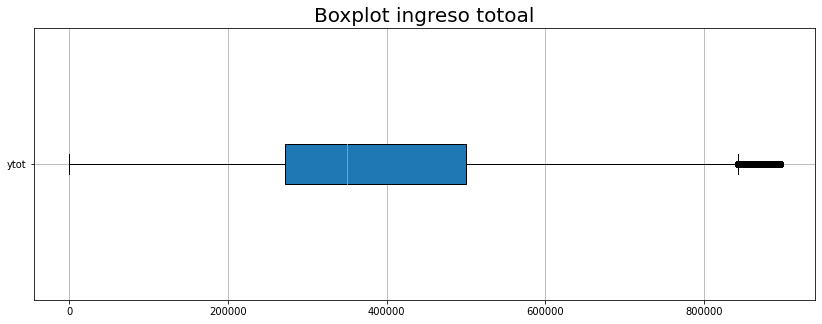

In [46]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso totoal", fontsize = 20)
plt.boxplot(df['ytot'], labels = ["ytot"], patch_artist=True, vert=False)
plt.show()

In [47]:
print("============================================================================")
print("Cantidad de valores outlier (valores de ingresos que exceden los 842.083):")
print(df[(df["ytot"] > 842083)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de ingresos que exceden los 842.083):
736


In [48]:
# Eliminacion de los registros
df = df.drop(df[df.ytot > 842083].index)
df.shape

(54646, 17)

### _Tercera revisión de la persistencia de valores outliers_

In [49]:
labels = ["ytot"]
bp = plt.boxplot([df['ytot']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  ytot          183.0             270194.25       350000.0   

   tercer cuartil (75%)  cota superior  
0              496000.0       834667.0

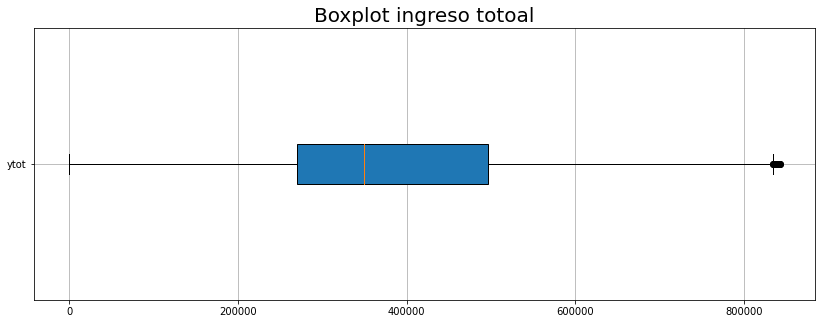

In [50]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso totoal", fontsize = 20)
plt.boxplot(df['ytot'], labels = ["ytot"], patch_artist=True, vert=False)
plt.show()

In [51]:
print("============================================================================")
print("Cantidad de valores outlier (valores de ingresos que exceden los 834.667):")
print(df[(df["ytot"] > 834667)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de ingresos que exceden los 834.667):
107


In [52]:
# Eliminacion de los registros
df = df.drop(df[df.ytot > 834667].index)
df.shape

(54539, 17)

### _Cuarta revisión de valores outliers_

In [53]:
labels = ["ytot"]
bp = plt.boxplot([df['ytot']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  ytot          183.0              270000.0       350000.0   

   tercer cuartil (75%)  cota superior  
0              493333.0       828325.0

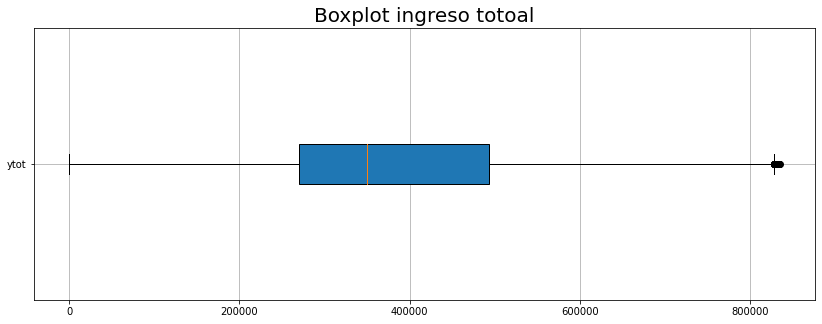

In [54]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot ingreso totoal", fontsize = 20)
plt.boxplot(df['ytot'], labels = ["ytot"], patch_artist=True, vert=False)
plt.show()

In [55]:
print("============================================================================")
print("Cantidad de valores outlier (valores de ingresos que exceden los 828.325):")
print(df[(df["ytot"] > 828325)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de ingresos que exceden los 828.325):
93


Al ser la cuarta revisión de valores outliers, se puede apreciar que respecto a la cantidad inicial (más de 6.000 registros) ya no son tantos por lo que, no se eliminan para evitar una mayor pérdida de registros de otras variables.

<hr>

## Variable edad

In [56]:
# Se observa la distribución de registros
df["edad"].describe()

count    54539.000000
mean        41.092888
std         13.656698
min         15.000000
25%         29.000000
50%         40.000000
75%         52.000000
max         99.000000
Name: edad, dtype: float64

### _Tabla y grafico boxplot_

In [57]:
labels = ["edad"]
bp = plt.boxplot([df['edad']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  edad           15.0                  29.0           40.0   

   tercer cuartil (75%)  cota superior  
0                  52.0           86.0

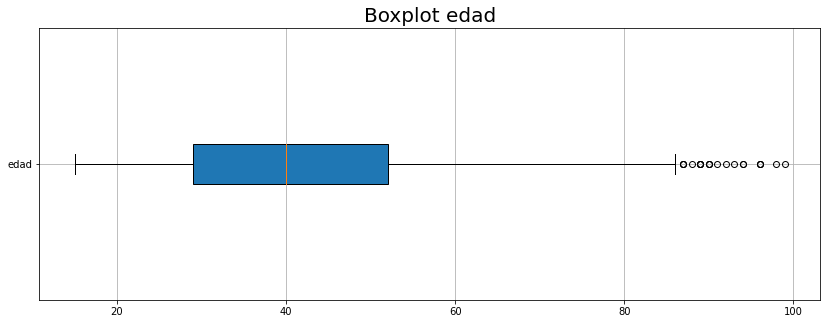

In [58]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot edad", fontsize = 20)
plt.boxplot(df['edad'], labels = ["edad"], patch_artist=True, vert=False)
plt.show()

In [59]:
print("============================================================================")
print("Cantidad de valores outlier (valores de edad que exceden los 86):")
print(df[(df["edad"] > 86)].shape[0])
print("============================================================================")

Cantidad de valores outlier (valores de edad que exceden los 86):
21


Al ser un volumen pequeño, se decide eliminar para poder tener un mejor set de datos en relación a esta variable.

In [60]:
# Eliminacion de los registros
df = df.drop(df[df.edad > 86].index)
df.shape

(54518, 17)

### _Primera revisión de persistencia de outliers_

In [61]:
labels = ["edad"]
bp = plt.boxplot([df['edad']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  edad           15.0                  29.0           40.0   

   tercer cuartil (75%)  cota superior  
0                  52.0           86.0

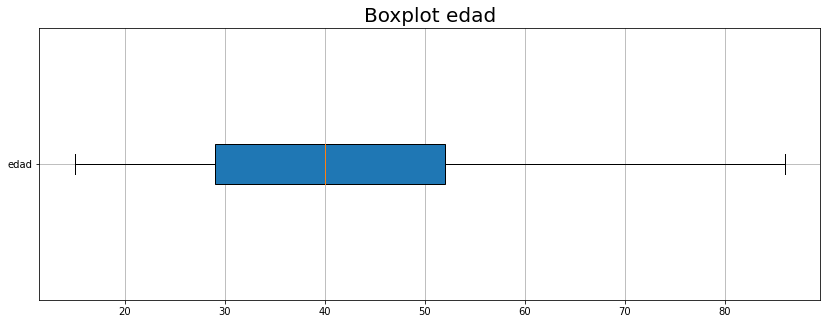

In [62]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot edad", fontsize = 20)
plt.boxplot(df['edad'], labels = ["edad"], patch_artist=True, vert=False)
plt.show()

Se puede apreciar que ya no quedan valores outliers, por lo que no hay más registros a eliminar.

<hr>

## Variable esc

In [63]:
# Se observa la distribución de registros
df["esc"].describe()

count    54518.000000
mean        11.442753
std          3.532846
min          0.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         22.000000
Name: esc, dtype: float64

### _Tabla y gráfico boxplot_

In [64]:
labels = ["escolaridad"]
bp = plt.boxplot([df['esc']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  escolaridad            4.0                  10.0           12.0   

   tercer cuartil (75%)  cota superior  
0                  14.0           20.0

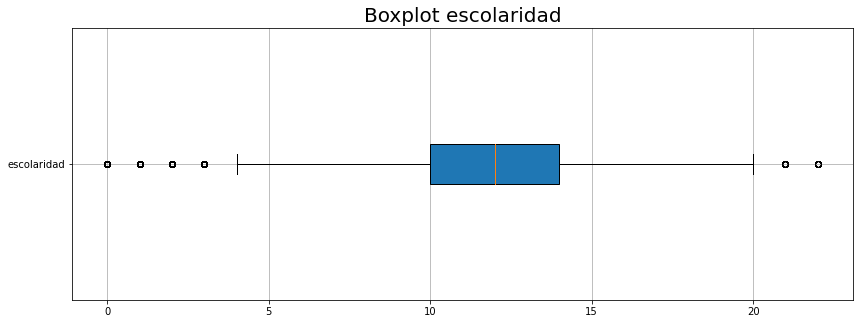

In [65]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot escolaridad", fontsize = 20)
plt.boxplot(df['esc'], labels = ["escolaridad"], patch_artist=True, vert=False)
plt.show()

Se puede apreciar la presencia de valores outliers tanto a la izquierda del gráfico de boxplot como a la derecha, a continuación se revisa cuántos datos son para cada caso.

In [66]:
print("===============================================================================================")
print("Cantidad de valores outlier (valores de años de escolaridad que exceden los 20):")
print(df[(df["esc"] > 20)].shape[0])
print("===============================================================================================")
print("Cantidad de valores outlier (valores de años de escolaridad que están por debajo de los 4):")
print(df[(df["esc"] < 4)].shape[0])
print("===============================================================================================")

Cantidad de valores outlier (valores de años de escolaridad que exceden los 20):
50
Cantidad de valores outlier (valores de años de escolaridad que están por debajo de los 4):
1749


Como se puede apreciar, al poseer valores outliers por ambos lados, se decide eliminar para tener datos más homogéneos de años de escolaridad.

In [67]:
# Eliminacion de los registros ouliers por la izquierda
df = df.drop(df[df.esc < 4].index)
# Eliminacion de los registros outliers por al derecha
df = df.drop(df[df.esc > 20].index)
df.shape

(52719, 17)

### _Primera revisión de valores outliers_

In [68]:
labels = ["escolaridad"]
bp = plt.boxplot([df['esc']], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  escolaridad            4.0                  10.0           12.0   

   tercer cuartil (75%)  cota superior  
0                  14.0           20.0

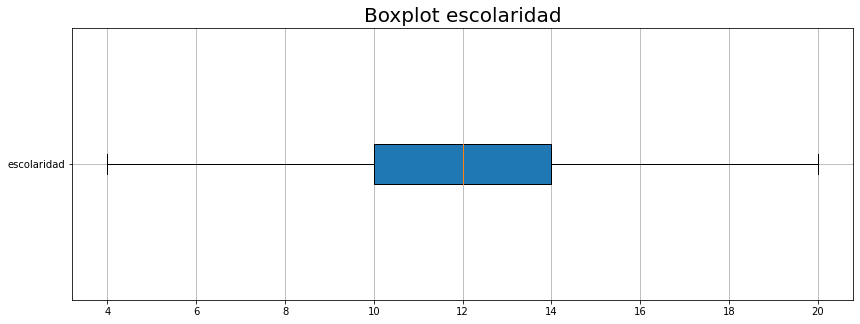

In [69]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot escolaridad", fontsize = 20)
plt.boxplot(df['esc'], labels = ["escolaridad"], patch_artist=True, vert=False)
plt.show()

Se puede apreciar que ya no quedan valores outliers para los años de escolaridad, por lo que no es necesario seguir eliminando registros.

In [70]:
# Se exporta planilla excel para evitar perdidadas de datos
df_copia = df
# Se crea el objeto que escribe el dataset
writer = pd.ExcelWriter('CASEN2017_seleccionada_imputada.xlsx')
# Se setea el data set sin los indices que atribuye pandas
df_copia.to_excel(writer, index=False)
# Se guarda el dataset en cuestion
writer.save()
print('Se ha exportado el excel.')

Se ha exportado el excel.


<hr>

# Estadística descriptiva y distribución de los datos
A continuación se muestra la forma en que está distribuida la información en la muestra extraída de la encuesta CASEN - 2017. Recordar que esta muestra pasó por todo un proceso de imputación de datos y eliminación de registros anómalos o valores outliers.

In [72]:
# Librerias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

In [73]:
# Lectura dataset
df1 = pd.read_excel("CASEN2017_seleccionada_imputada.xlsx")
df1.head()

sexo  edad                                           ecivil  o1  \
0   Mujer    21                                       Soltero(a)  Sí   
1  Hombre    24  Conviviente o pareja sin acuerdo de unión civil  Sí   
2  Hombre    28  Conviviente o pareja sin acuerdo de unión civil  Sí   
3  Hombre    26                                        Casado(a)  No   
4   Mujer    59                                      Separado(a)  Sí   

                                             oficio1               o16  \
0                         Trabajadores no calificado        Plazo fijo   
1  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
2  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
3                         Trabajadores no calificado  Plazo indefinido   
4  Operadores de instalaciones y máquinas y monta...  Plazo indefinido   

                              s12    ytot    pobreza  esc  \
0            Ninguno (Particular)  211091  No pobres    7   
1                         No sabe  281750  No pobres   12   
2                         No sabe  311750  No pobres   12   
3  Sistema Público FONASA Grupo B  341667  No pobres   15   
4  Sistema Público FONASA Grupo D  595000  No pobres   12   

                              educ     activ              indmat       indsan  \
0                    Básica Incom.  Ocupados  Vivienda Aceptable    Aceptable   
1                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
2                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
3  Técnico Nivel Superior Completo  Ocupados  Vivienda Aceptable  Deficitario   
4                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   

    calglobviv                     hacinamiento  pobreza_int  
0    Aceptable  Sin hacinamiento (2,49 y menos)            0  
1    Aceptable  Sin hacinamiento (2,49 y menos)            0  
2    Aceptable  Sin hacinamiento (2,49 y menos)            0  
3  Recuperable  Sin hacinamiento (2,49 y menos)            0  
4    Aceptable  Sin hacinamiento (2,49 y menos)            0

In [74]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df1.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df1.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df1.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(52719, 17)
Tipo de variable de las columnas:
sexo            object
edad             int64
ecivil          object
o1              object
oficio1         object
o16             object
s12             object
ytot             int64
pobreza         object
esc              int64
educ            object
activ           object
indmat          object
indsan          object
calglobviv      object
hacinamiento    object
pobreza_int      int64
dtype: object
Cantidad de valores nulos por columna:
sexo            0
edad            0
ecivil          0
o1              0
oficio1         0
o16             0
s12             0
ytot            0
pobreza         0
esc             0
educ            0
activ           0
indmat          0
indsan          0
calglobviv      0
hacinamiento    0
pobreza_int     0
dtype: int64


## Cantidad de personas por sexo

In [9]:
dfSexo = df1.groupby("sexo").agg({
    "sexo": "count"
})
dfSexo.columns = ["registros"]
dfSexo

registros
sexo             
Hombre      29017
Mujer       23702

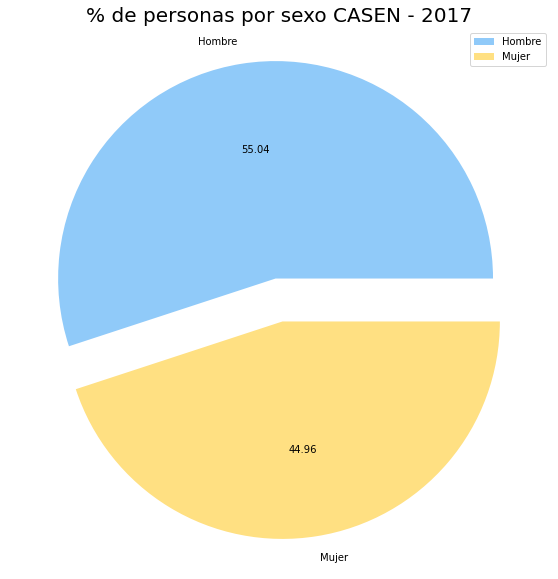

In [12]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#90CAF9", "#FFE082"]
plt.pie(dfSexo["registros"], labels= dfSexo.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de personas por sexo CASEN - 2017", fontsize = 20)
plt.show()

## Distribución de edad

In [11]:
df1["edad"].describe()

count    52719.000000
mean        40.604279
std         13.413228
min         15.000000
25%         29.000000
50%         40.000000
75%         51.000000
max         86.000000
Name: edad, dtype: float64

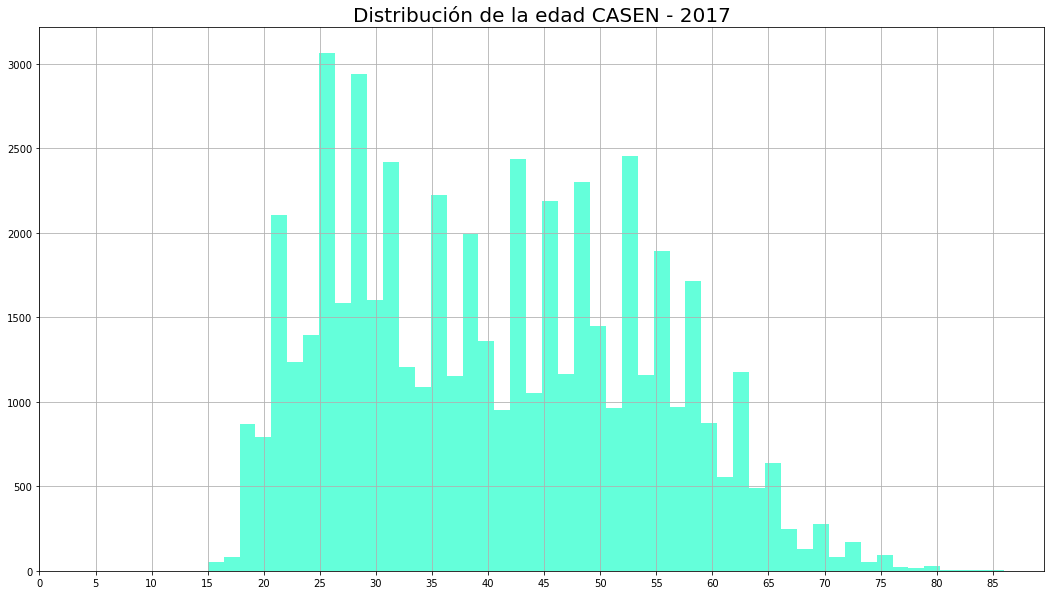

In [15]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df1["edad"], facecolor = "#64FFDA", bins = 50)
plt.title("Distribución de la edad CASEN - 2017", fontsize = 20)
plt.xticks(np.arange(0, 87, 5))
plt.show()

## Grafico por estado civil (ecivil)

In [17]:
dfEcivil = df1.groupby("ecivil").agg({
    "ecivil": "count"
})
dfEcivil.columns = ["registros"]
dfEcivil = dfEcivil.sort_values("registros", ascending=False)
dfEcivil

registros
ecivil                                                    
Soltero(a)                                           19029
Casado(a)                                            16701
Conviviente o pareja sin acuerdo de unión civil      11500
Separado(a)                                           3330
Divorciado (a)                                        1111
Viudo(a)                                               838
Conviviente civil (con acuerdo de unión civil)         150
Anulado(a)                                              60

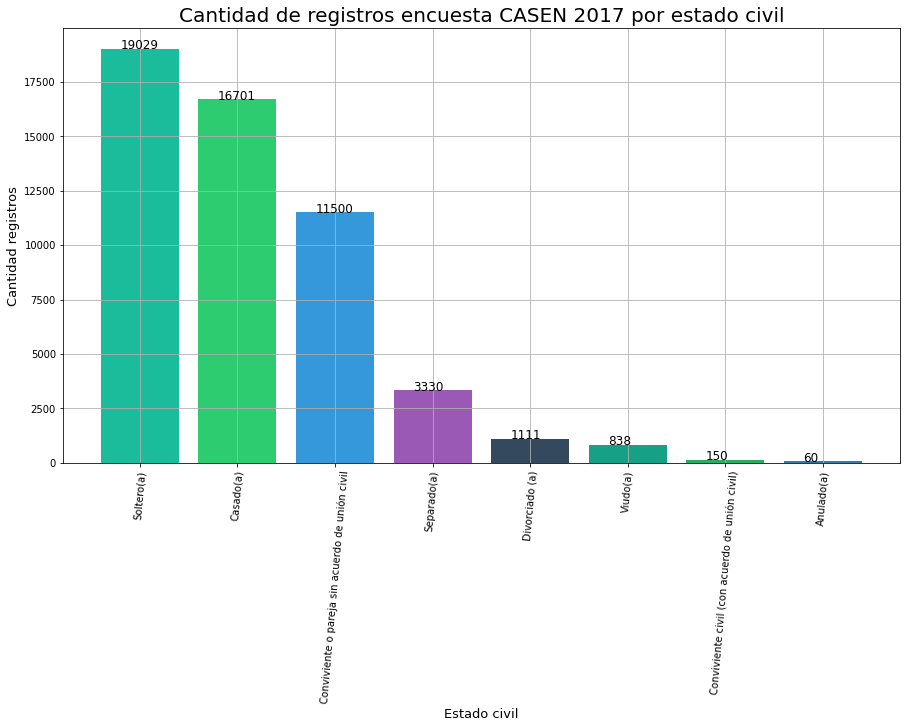

In [35]:
colores = ["#1ABC9C", "#2ECC71", "#3498DB", "#9B59B6", "#34495E", "#16A085", "#27AE60", "#2980B9"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfEcivil.index, dfEcivil["registros"], color = colores)
plt.xticks(rotation = 85)
plt.xlabel("Estado civil", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros encuesta CASEN 2017 por estado civil", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfEcivil["registros"]):
    plt.text(x = index-0.2, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

## Gráfico por si trabajó la semana pasada (o1)

In [23]:
dfO1 = df1.groupby("o1").agg({
    "o1": "count"
})
dfO1.columns = ["registros"]
dfO1 = dfO1.sort_values("registros", ascending=False)
dfO1

registros
o1           
Sí      51169
No       1550

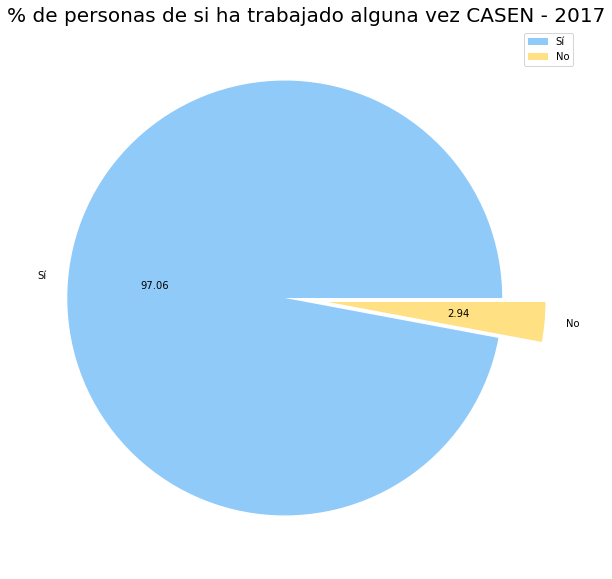

In [25]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#90CAF9", "#FFE082"]
plt.pie(dfO1["registros"], labels= dfO1.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de personas de si ha trabajado alguna vez CASEN - 2017", fontsize = 20)
plt.show()

## Gráfico del tipo de contrato (o16)

In [26]:
dfO16 = df1.groupby("o16").agg({
    "o16": "count"
})
dfO16.columns = ["registros"]
dfO16 = dfO16.sort_values("registros", ascending=False)
dfO16

registros
o16                           
Plazo indefinido         35357
Plazo fijo               17147
No sabe/no responde        193
No aplica                   22

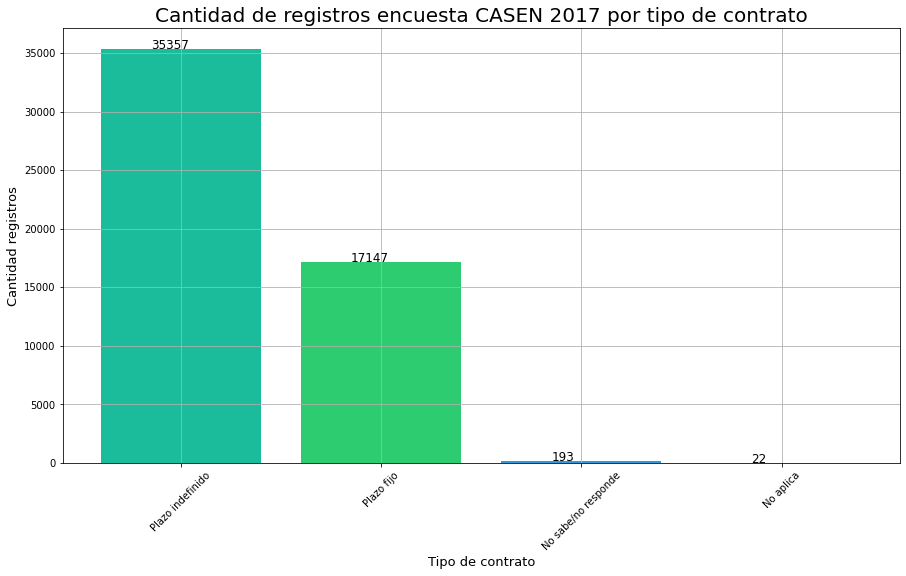

In [33]:
colores = ["#1ABC9C", "#2ECC71", "#3498DB", "#9B59B6"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfO16.index, dfO16["registros"], color = colores)
plt.xticks(rotation = 45)
plt.xlabel("Tipo de contrato", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros encuesta CASEN 2017 por tipo de contrato", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfO16["registros"]):
    plt.text(x = index-0.15, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

## Gráfico del tipo de sistema previsional de salud (s12)

In [34]:
dfS12 = df1.groupby("s12").agg({
    "s12": "count"
})
dfS12.columns = ["registros"]
dfS12 = dfS12.sort_values("registros", ascending=False)
dfS12

registros
s12                                            
Sistema Público FONASA Grupo B            18358
Sistema Público FONASA Grupo C            10643
Sistema Público FONASA Grupo D             8062
ISAPRE                                     4748
Sistema Público FONASA No sabe grupo       3858
Sistema Público FONASA Grupo A             3635
No sabe                                    1307
Ninguno (Particular)                        976
FF.AA. y de Orden                           729
Otro sistema                                403

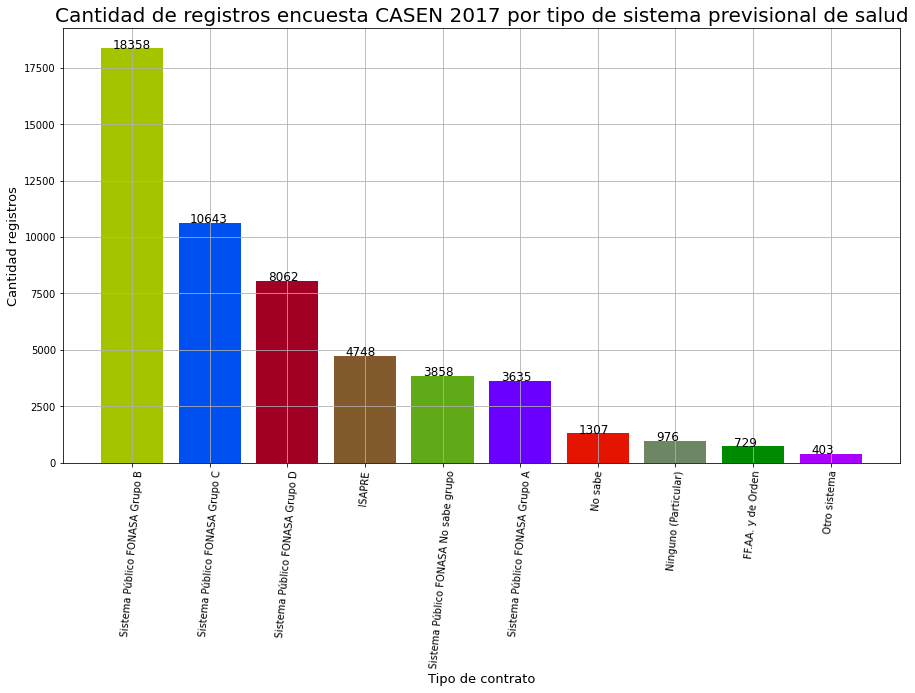

In [40]:
colores = ["#A4C400", "#0050EF", "#A20025", "#825A2C", "#60A917", "#6A00FF", "#E51400", "#6D8764", "#008A00", "#AA00FF"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfS12.index, dfS12["registros"], color = colores)
plt.xticks(rotation = 85)
plt.xlabel("Tipo de contrato", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros encuesta CASEN 2017 por tipo de sistema previsional de salud", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfS12["registros"]):
    plt.text(x = index-0.25, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

## Distribución de los ingresos totales (ytot)

In [41]:
df1["ytot"].describe()

count     52719.000000
mean     384108.663404
std      175693.110026
min         250.000000
25%      271667.000000
50%      350000.000000
75%      500000.000000
max      834667.000000
Name: ytot, dtype: float64

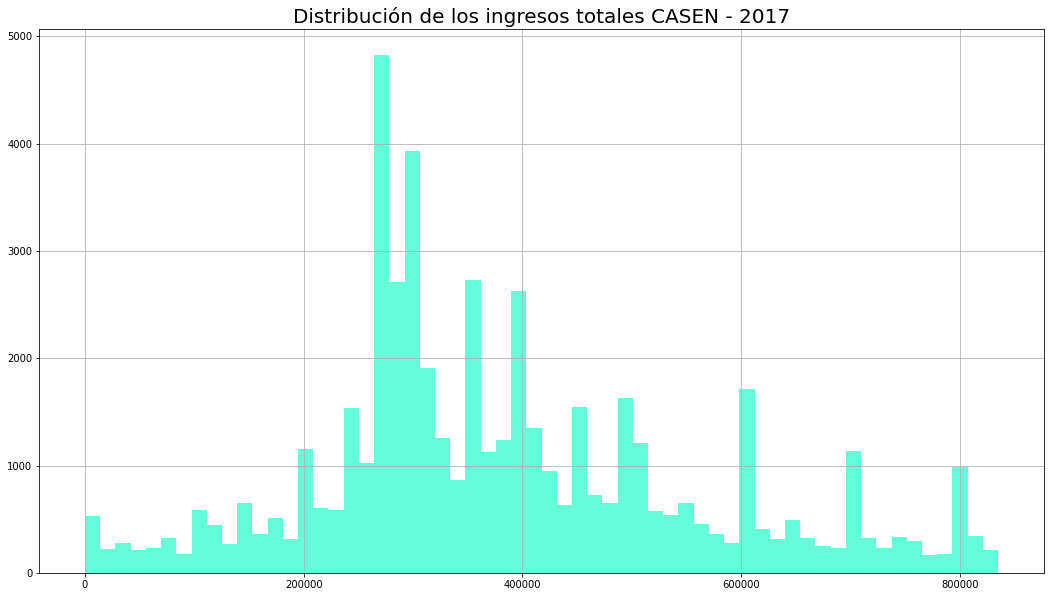

In [43]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df1["ytot"], facecolor = "#64FFDA", bins = 60)
plt.title("Distribución de los ingresos totales CASEN - 2017", fontsize = 20)
plt.show()

## Gráfico de tipo de pobreza 

In [45]:
dfPobreza = df1.groupby("pobreza").agg({
    "pobreza": "count"
})
dfPobreza.columns = ["registros"]
dfPobreza = dfPobreza.sort_values("registros", ascending=False)
dfPobreza

registros
pobreza                      
No pobres               50423
Pobres no extremos       1916
Pobres extremos           380

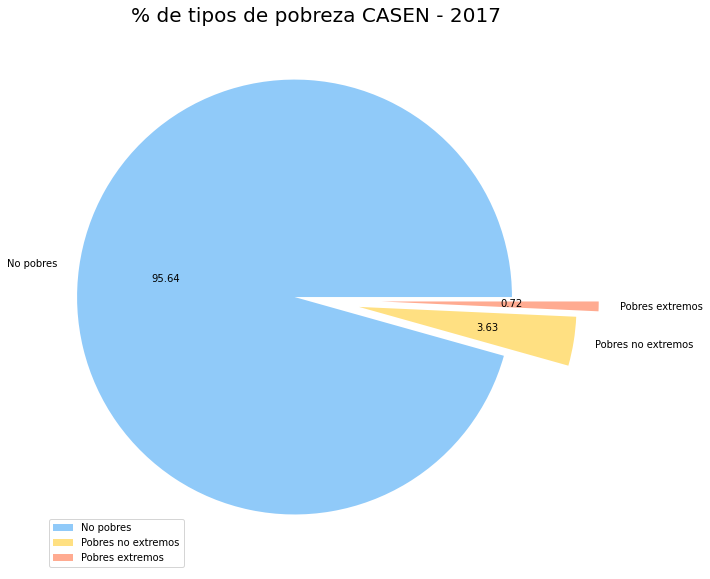

In [52]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.2,0.3]
color = ["#90CAF9", "#FFE082", "#FFAB91"]
plt.pie(dfPobreza["registros"], labels= dfPobreza.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de tipos de pobreza CASEN - 2017", fontsize = 20)
plt.show()

## Gráfico de años de educación (esc)

In [54]:
df1["esc"].describe()

count    52719.000000
mean        11.752632
std          3.098185
min          4.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         20.000000
Name: esc, dtype: float64

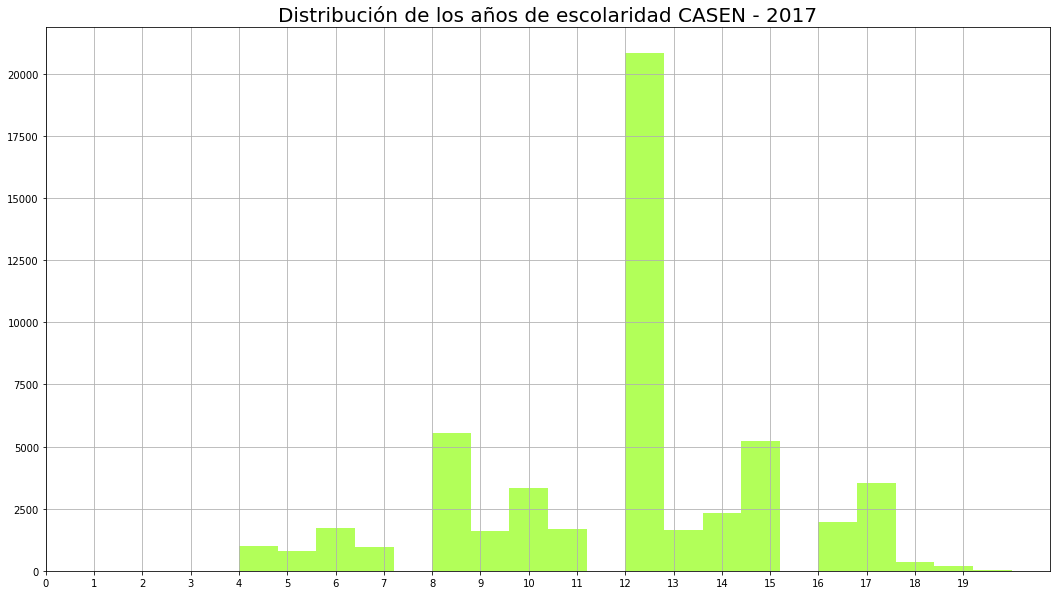

In [55]:
plt.figure(figsize=(18,10))
plt.grid()
plt.hist(df1["esc"], facecolor = "#B2FF59", bins = 20)
plt.title("Distribución de los años de escolaridad CASEN - 2017", fontsize = 20)
plt.xticks(np.arange(0, 20, 1))
plt.show()

## Gráfico de nivel educacional (educ)

In [57]:
dfEduc = df1.groupby("educ").agg({
    "educ": "count"
})
dfEduc.columns = ["registros"]
dfEduc = dfEduc.sort_values("registros", ascending=False)
dfEduc

registros
educ                                        
M. Hum. Completa                       15712
Básica Compl.                           5771
M. Téc Completa                         5663
M. Hum. Incompleta                      5610
Técnico Nivel Superior Completo         4906
Profesional Completo                    4743
Básica Incom.                           4076
Profesional Incompleto                  2841
Técnico Nivel Superior Incompleta       1933
M. Téc. Prof. Incompleta                 872
NS/NR                                    310
Postgrado Completo                       169
Postgrado Incompleto                     113

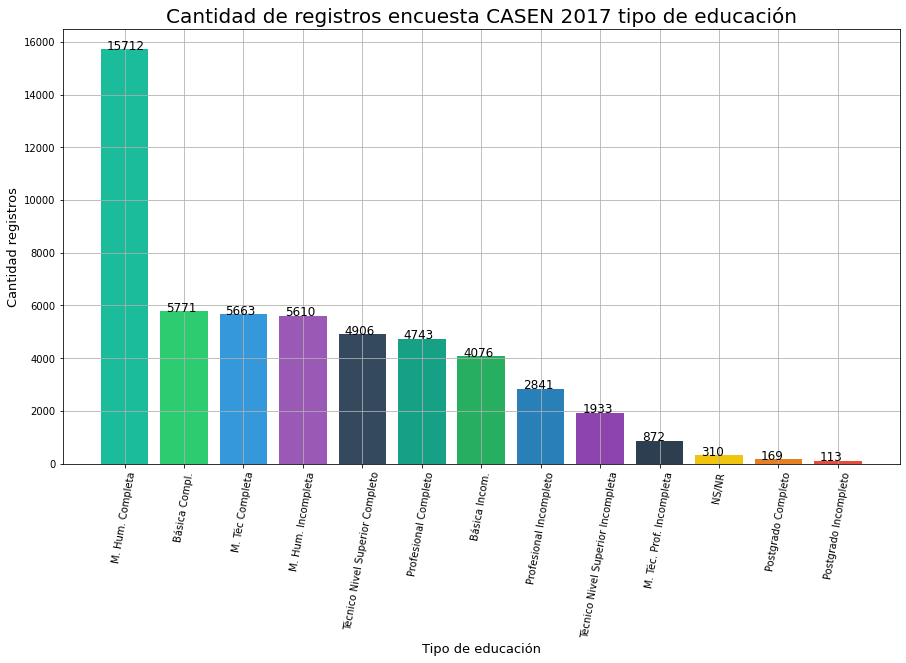

In [62]:
colores = ["#1ABC9C", "#2ECC71", "#3498DB", "#9B59B6", "#34495E", "#16A085", "#27AE60", "#2980B9", "#8E44AD", "#2C3E50", "#F1C40F", "#E67E22", "#E74C3C"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfEduc.index, dfEduc["registros"], color = colores)
plt.xticks(rotation = 80)
plt.xlabel("Tipo de educación", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros encuesta CASEN 2017 tipo de educación", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfEduc["registros"]):
    plt.text(x = index-0.3, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

## Gráfico de condición de actividad económica (activ)

In [63]:
dfActiv = df1.groupby("activ").agg({
    "activ": "count"
})
dfActiv.columns = ["registros"]
dfActiv = dfActiv.sort_values("registros", ascending=False)
dfActiv

registros
activ               
Ocupados       52697
Inactivos         22

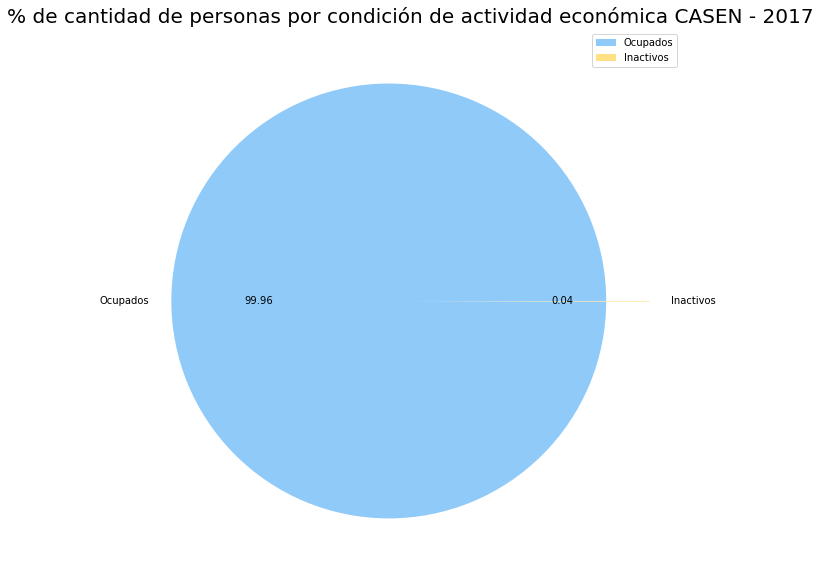

In [64]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#90CAF9", "#FFE082"]
plt.pie(dfActiv["registros"], labels= dfActiv.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de cantidad de personas por condición de actividad económica CASEN - 2017", fontsize = 20)
plt.show()

## Gráfico de indicador de materialidad (indmat) 

In [65]:
dfIndmat = df1.groupby("indmat").agg({
    "indmat": "count"
})
dfIndmat.columns = ["registros"]
dfIndmat = dfIndmat.sort_values("registros", ascending=False)
dfIndmat

registros
indmat                           
Vivienda Aceptable          46170
Vivienda Recuperable         6383
Vivienda Irrecuperable         93
SD/NR                          73

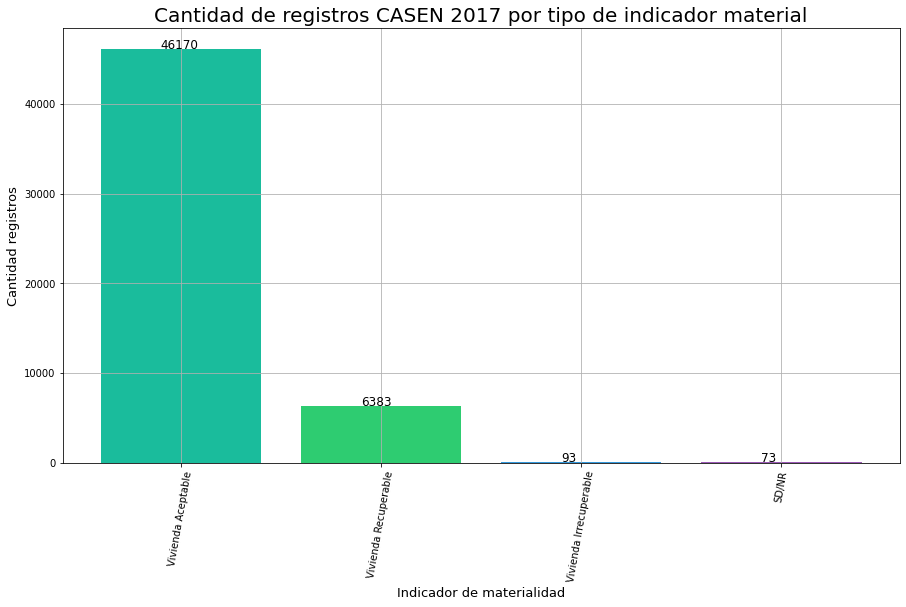

In [68]:
colores = ["#1ABC9C", "#2ECC71", "#3498DB", "#9B59B6"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfIndmat.index, dfIndmat["registros"], color = colores)
plt.xticks(rotation = 80)
plt.xlabel("Indicador de materialidad", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros CASEN 2017 por tipo de indicador material", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfIndmat["registros"]):
    plt.text(x = index-0.1, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

## Gráfico de indicador de saneamiento (indsan)

In [69]:
dfIndsan = df1.groupby("indsan").agg({
    "indsan": "count"
})
dfIndsan.columns = ["registros"]
dfIndsan = dfIndsan.sort_values("registros", ascending=False)
dfIndsan

registros
indsan                
Aceptable        48809
Deficitario       3876
Sin Dato            34

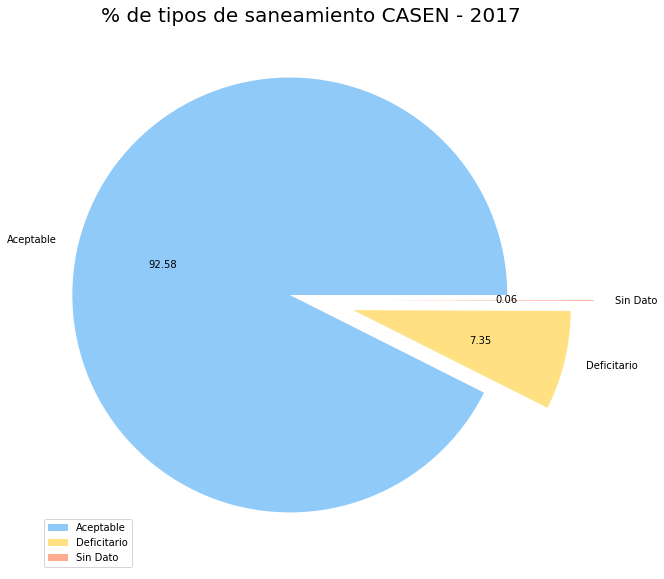

In [70]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.2,0.3]
color = ["#90CAF9", "#FFE082", "#FFAB91"]
plt.pie(dfIndsan["registros"], labels= dfIndsan.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de tipos de saneamiento CASEN - 2017", fontsize = 20)
plt.show()

## Gráfico de calidad global de la vivienda (calglobviv)

In [71]:
dfCalglobviv = df1.groupby("calglobviv").agg({
    "calglobviv": "count"
})
dfCalglobviv.columns = ["registros"]
dfCalglobviv = dfCalglobviv.sort_values("registros", ascending=False)
dfCalglobviv

registros
calglobviv              
Aceptable          44649
Recuperable         7608
Irrecuperable        351
Sin dato             111

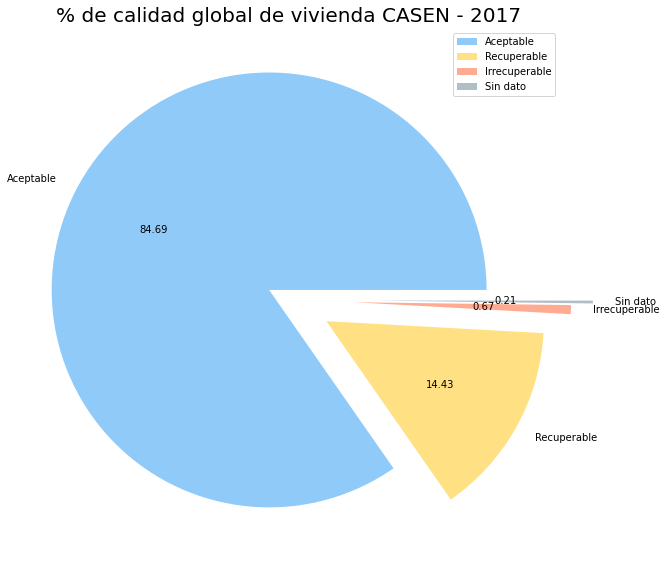

In [72]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.2,0.3, 0.4]
color = ["#90CAF9", "#FFE082", "#FFAB91", "#B0BEC5"]
plt.pie(dfCalglobviv["registros"], labels= dfCalglobviv.index, autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de calidad global de vivienda CASEN - 2017", fontsize = 20)
plt.show()

## Gráfico de tipo de hacinamiento

In [74]:
dfHacinamiento = df1.groupby("hacinamiento").agg({
    "hacinamiento": "count"
})
dfHacinamiento.columns = ["registros"]
dfHacinamiento = dfHacinamiento.sort_values("registros", ascending=False)
dfHacinamiento

registros
hacinamiento                                   
Sin hacinamiento (2,49 y menos)           47994
Hacinamiento medio bajo (2,5 a 3,49)       3421
Hacinamiento medio alto (3,5 a 4,9)         773
Hacinamiento crítico (5 y más)              404
NS/NR                                       127

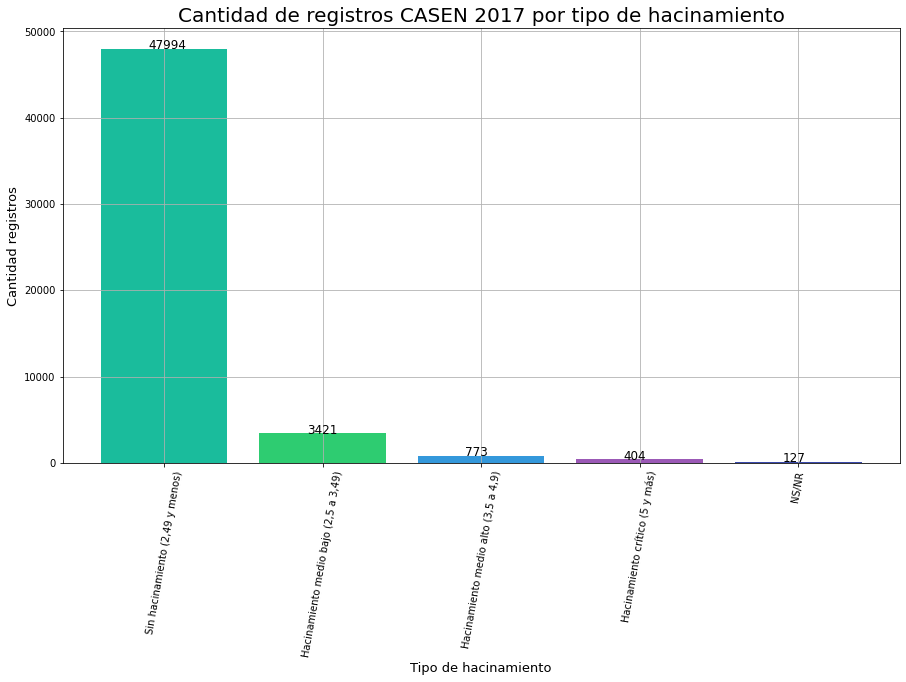

In [75]:
colores = ["#1ABC9C", "#2ECC71", "#3498DB", "#9B59B6", "#3949AB"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(dfHacinamiento.index, dfHacinamiento["registros"], color = colores)
plt.xticks(rotation = 80)
plt.xlabel("Tipo de hacinamiento", fontsize = 13)
plt.ylabel("Cantidad registros", fontsize = 13)
plt.title("Cantidad de registros CASEN 2017 por tipo de hacinamiento", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(dfHacinamiento["registros"]):
    plt.text(x = index-0.1, y = data, s = f"{data}", fontdict=dict(fontsize = 12))
plt.show()

### _Expresado del estado de datos, se procede a borrar la columna de "pobreza" para quedarse únicamente con la que posee el identificador_

In [75]:
# Se elimina la columna 
del df1["pobreza"]
df1.head()

sexo  edad                                           ecivil  o1  \
0   Mujer    21                                       Soltero(a)  Sí   
1  Hombre    24  Conviviente o pareja sin acuerdo de unión civil  Sí   
2  Hombre    28  Conviviente o pareja sin acuerdo de unión civil  Sí   
3  Hombre    26                                        Casado(a)  No   
4   Mujer    59                                      Separado(a)  Sí   

                                             oficio1               o16  \
0                         Trabajadores no calificado        Plazo fijo   
1  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
2  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
3                         Trabajadores no calificado  Plazo indefinido   
4  Operadores de instalaciones y máquinas y monta...  Plazo indefinido   

                              s12    ytot  esc  \
0            Ninguno (Particular)  211091    7   
1                         No sabe  281750   12   
2                         No sabe  311750   12   
3  Sistema Público FONASA Grupo B  341667   15   
4  Sistema Público FONASA Grupo D  595000   12   

                              educ     activ              indmat       indsan  \
0                    Básica Incom.  Ocupados  Vivienda Aceptable    Aceptable   
1                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
2                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
3  Técnico Nivel Superior Completo  Ocupados  Vivienda Aceptable  Deficitario   
4                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   

    calglobviv                     hacinamiento  pobreza_int  
0    Aceptable  Sin hacinamiento (2,49 y menos)            0  
1    Aceptable  Sin hacinamiento (2,49 y menos)            0  
2    Aceptable  Sin hacinamiento (2,49 y menos)            0  
3  Recuperable  Sin hacinamiento (2,49 y menos)            0  
4    Aceptable  Sin hacinamiento (2,49 y menos)            0

In [76]:
# Se exporta planilla excel para evitar perdidadas de datos
df_copia = df1
# Se crea el objeto que escribe el dataset
writer = pd.ExcelWriter('CASEN2017_seleccionada_imputada2.xlsx')
# Se setea el data set sin los indices que atribuye pandas
df_copia.to_excel(writer, index=False)
# Se guarda el dataset en cuestion
writer.save()
print('Se ha exportado el excel.')

Se ha exportado el excel.


# Variables dummies
Se convierten a variables dummies aquellas componentes que son de tipo categórica.

In [77]:
# Librerias
import pandas as pd # Manipulación de datos
import numpy as np
pd.options.mode.chained_assignment = None

In [78]:
df2 = pd.read_excel("CASEN2017_seleccionada_imputada2.xlsx")
df2.head()

sexo  edad                                           ecivil  o1  \
0   Mujer    21                                       Soltero(a)  Sí   
1  Hombre    24  Conviviente o pareja sin acuerdo de unión civil  Sí   
2  Hombre    28  Conviviente o pareja sin acuerdo de unión civil  Sí   
3  Hombre    26                                        Casado(a)  No   
4   Mujer    59                                      Separado(a)  Sí   

                                             oficio1               o16  \
0                         Trabajadores no calificado        Plazo fijo   
1  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
2  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
3                         Trabajadores no calificado  Plazo indefinido   
4  Operadores de instalaciones y máquinas y monta...  Plazo indefinido   

                              s12    ytot  esc  \
0            Ninguno (Particular)  211091    7   
1                         No sabe  281750   12   
2                         No sabe  311750   12   
3  Sistema Público FONASA Grupo B  341667   15   
4  Sistema Público FONASA Grupo D  595000   12   

                              educ     activ              indmat       indsan  \
0                    Básica Incom.  Ocupados  Vivienda Aceptable    Aceptable   
1                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
2                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   
3  Técnico Nivel Superior Completo  Ocupados  Vivienda Aceptable  Deficitario   
4                 M. Hum. Completa  Ocupados  Vivienda Aceptable    Aceptable   

    calglobviv                     hacinamiento  pobreza_int  
0    Aceptable  Sin hacinamiento (2,49 y menos)            0  
1    Aceptable  Sin hacinamiento (2,49 y menos)            0  
2    Aceptable  Sin hacinamiento (2,49 y menos)            0  
3  Recuperable  Sin hacinamiento (2,49 y menos)            0  
4    Aceptable  Sin hacinamiento (2,49 y menos)            0

In [79]:
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df2.dtypes)
print("===================================================================")

Tipo de variable de las columnas:
sexo            object
edad             int64
ecivil          object
o1              object
oficio1         object
o16             object
s12             object
ytot             int64
esc              int64
educ            object
activ           object
indmat          object
indsan          object
calglobviv      object
hacinamiento    object
pobreza_int      int64
dtype: object


Por ende se crean variables dummies para las columnas:
- sexo
- ecivil
- o1
- oficio1
- o16
- s12
- educ
- activ
- indmat
- indsan
- calglobviv
- hacinamiento

In [80]:
# Variables dummies
columnas_cat = ["sexo", "ecivil", "o1", "oficio1", "o16", "s12", "educ", "activ","indmat","indsan","calglobviv","hacinamiento"]
df_completo = pd.get_dummies(df2, columns = columnas_cat)
df_completo

edad    ytot  esc  pobreza_int  sexo_Hombre  sexo_Mujer  \
0        21  211091    7            0            0           1   
1        24  281750   12            0            1           0   
2        28  311750   12            0            1           0   
3        26  341667   15            0            1           0   
4        59  595000   12            0            0           1   
...     ...     ...  ...          ...          ...         ...   
52714    59  529333   12            0            0           1   
52715    44  400000   10            0            0           1   
52716    28  360000   12            0            1           0   
52717    50  360000    9            0            1           0   
52718    40  150000    8            0            0           1   

       ecivil_Anulado(a)  ecivil_Casado(a)  \
0                      0                 0   
1                      0                 0   
2                      0                 0   
3                      0                 1   
4                      0                 0   
...                  ...               ...   
52714                  0                 0   
52715                  0                 0   
52716                  0                 0   
52717                  0                 0   
52718                  0                 0   

       ecivil_Conviviente civil (con acuerdo de unión civil)  \
0                                                      0       
1                                                      0       
2                                                      0       
3                                                      0       
4                                                      0       
...                                                  ...       
52714                                                  0       
52715                                                  0       
52716                                                  0       
52717                                                  0       
52718                                                  0       

       ecivil_Conviviente o pareja sin acuerdo de unión civil  ...  \
0                                                      0       ...   
1                                                      1       ...   
2                                                      1       ...   
3                                                      0       ...   
4                                                      0       ...   
...                                                  ...       ...   
52714                                                  0       ...   
52715                                                  0       ...   
52716                                                  0       ...   
52717                                                  0       ...   
52718                                                  1       ...   

       indsan_Sin Dato  calglobviv_Aceptable  calglobviv_Irrecuperable  \
0                    0                     1                         0   
1                    0                     1                         0   
2                    0                     1                         0   
3                    0                     0                         0   
4                    0                     1                         0   
...                ...                   ...                       ...   
52714                0                     0                         1   
52715                0                     0                         1   
52716                0                     0                         1   
52717                0                     0                         0   
52718                0                     0                         0   

       calglobviv_Recuperable  calglobviv_Sin dato  \
0                           0                    0   
1                           0                    0   


In [81]:
df_completo.columns

Index(['edad', 'ytot', 'esc', 'pobreza_int', 'sexo_Hombre', 'sexo_Mujer',
       'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente civil (con acuerdo de unión civil)',
       'ecivil_Conviviente o pareja sin acuerdo de unión civil',
       'ecivil_Divorciado (a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'o1_No', 'o1_Sí',
       'oficio1_Agricultores y trabajadores calificados agropecuarios y pesq',
       'oficio1_Empleados de oficina', 'oficio1_Fuerzas Armada',
       'oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo',
       'oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'oficio1_Operadores de instalaciones y máquinas y montadore',
       'oficio1_Profesionales, científicos e intelectuale', 'oficio1_Sin dato',
       'oficio1_Trabajadores de los servicios y vendedores de comerci',
       'oficio1_Trabajadores no calificado',
       'oficio1_Técnicos profesionales de nivel medi', 'o16_No ap

In [82]:
# Se exporta planilla excel para evitar perdidadas de datos
df_copia = df_completo
# Se crea el objeto que escribe el dataset
writer = pd.ExcelWriter('CASEN2017_seleccionada_imputada_dummie.xlsx')
# Se setea el data set sin los indices que atribuye pandas
df_copia.to_excel(writer, index=False)
# Se guarda el dataset en cuestion
writer.save()
print('Se ha exportado el excel.')

Se ha exportado el excel.


# Arreglos de nombre modelo y porcentaje precision

Para obtener una mejor visualización posterior de los resultados y para compararlos, se crean 3 listas las cuales son:
- List_Models (contiene el nombre del modelo de clasificador)
- List_Accuracy (contiene el grado de precisión del modelo en base al accuracy)
- List_f1 (contiene el grado de precisión del modelo en base al f1-score)

In [15]:
List_Models = []
List_Accuracy = []
List_f1 = []

Sobre estas listas, se irá añadiendo en cada una el nombre del modelo aplicado, el accuracy y el f1-score para una posterior comparación de precisión.

<hr>

# Regresión logística multinomial
Se empleó una regresión logística multinomial, puesto que la variable a clasificar posee 3 features posibles: 0, 1 y 3 (identificadores previamente definidos para cada uno de los tipos de pobreza asociados a la encuesta CASEN 2017). Se decidió emplear (y partir con este modelo) para poder visualizar de forma inmediata si las variables y la data recopilada puede llegar a generar un buen modelo. 

In [16]:
# Librerias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [17]:
df3 = pd.read_excel("CASEN2017_seleccionada_imputada_dummie.xlsx")
df3.head()

edad    ytot  esc  pobreza_int  sexo_Hombre  sexo_Mujer  ecivil_Anulado(a)  \
0    21  211091    7            0            0           1                  0   
1    24  281750   12            0            1           0                  0   
2    28  311750   12            0            1           0                  0   
3    26  341667   15            0            1           0                  0   
4    59  595000   12            0            0           1                  0   

   ecivil_Casado(a)  ecivil_Conviviente civil (con acuerdo de unión civil)  \
0                 0                                                  0       
1                 0                                                  0       
2                 0                                                  0       
3                 1                                                  0       
4                 0                                                  0       

   ecivil_Conviviente o pareja sin acuerdo de unión civil  ...  \
0                                                  0       ...   
1                                                  1       ...   
2                                                  1       ...   
3                                                  0       ...   
4                                                  0       ...   

   indsan_Sin Dato  calglobviv_Aceptable  calglobviv_Irrecuperable  \
0                0                     1                         0   
1                0                     1                         0   
2                0                     1                         0   
3                0                     0                         0   
4                0                     1                         0   

   calglobviv_Recuperable  calglobviv_Sin dato  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       1                    0   
4                       0                    0   

   hacinamiento_Hacinamiento crítico (5 y más)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   hacinamiento_Hacinamiento medio alto (3,5 a 4,9)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)  hacinamiento_NS/NR  \
0                                                  0                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

   hacinamiento_Sin hacinamiento (2,49 y menos)  
0                                             1  
1                                             1  
2                                             1  
3                                             1  
4                                             1  

[5 rows x 72 columns]

In [5]:
print("===================================================================")
print("COLUMNAS:")
print("===================================================================")
print(df3.columns)

COLUMNAS:
Index(['edad', 'ytot', 'esc', 'pobreza_int', 'sexo_Hombre', 'sexo_Mujer',
       'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente civil (con acuerdo de unión civil)',
       'ecivil_Conviviente o pareja sin acuerdo de unión civil',
       'ecivil_Divorciado (a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'o1_No', 'o1_Sí',
       'oficio1_Agricultores y trabajadores calificados agropecuarios y pesq',
       'oficio1_Empleados de oficina', 'oficio1_Fuerzas Armada',
       'oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo',
       'oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'oficio1_Operadores de instalaciones y máquinas y montadore',
       'oficio1_Profesionales, científicos e intelectuale', 'oficio1_Sin dato',
       'oficio1_Trabajadores de los servicios y vendedores de comerci',
       'oficio1_Trabajadores no calificado',
       'oficio1_Técnicos profesionales de nivel medi', 

In [18]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df3.drop("pobreza_int", axis = 1) # variables independientes
Y = df3["pobreza_int"]

Separación del segmento de training y testing en proporción 80-20

In [19]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (42175, 71)
Y:  (42175,)
Tamaño de datos de testing: 
X:  (10544, 71)
T:  (10544,)


Modelo de Regresión Logística Multinomial

In [20]:
logisticRegr = LogisticRegression()
logReg = logisticRegr.fit(X_train, Y_train)
print("Interceptos:")
logReg.intercept_

Interceptos:


array([ 1.81042464e-10, -8.27218696e-11, -9.83205943e-11])

Coeficientes de la regresión logíscia multinomial

In [21]:
logReg.coef_

array([[ 7.02524333e-09,  1.02794140e-05,  2.73618765e-09,
         1.85799722e-11,  1.62462492e-10, -8.40337937e-15,
         2.17217781e-11,  9.27874055e-13, -2.21575181e-11,
         3.37129909e-12, -2.19492269e-12,  1.76888840e-10,
         2.49351682e-12,  1.01973911e-11,  1.70845073e-10,
        -2.81981814e-12,  3.50435586e-11,  1.54097190e-12,
         1.24277157e-12, -2.87962656e-12, -6.68168838e-13,
         3.24124004e-11,  2.32820215e-13,  5.73641879e-11,
         1.93966010e-11,  4.01767659e-11,  6.16954085e-13,
         2.67153777e-12,  5.32106415e-11,  1.24543331e-10,
         3.64968755e-12,  4.75961189e-11,  6.09289330e-12,
         1.10553509e-11,  1.19796049e-12, -9.31245326e-12,
         3.94701307e-11,  2.94102978e-11,  3.28660492e-11,
         1.90164284e-11, -1.51368436e-11, -1.28562486e-11,
         4.80391275e-11, -1.57937841e-13,  2.46049064e-11,
         3.96608848e-12,  1.81710048e-12,  1.81100536e-12,
         1.27551343e-12,  3.95797840e-11,  4.28669002e-1

In [22]:
logReg_pred = logReg.predict(X_test)

In [23]:
logReg_accuracy = accuracy_score(Y_test, logReg_pred)
logReg_f1 = f1_score(Y_test, logReg_pred, average='weighted')
print('Regresion Logistica Multinomial (accuracy): ', (logReg_accuracy*100))
print('Regresion Logistica Multinomial (f1-score): ', (logReg_f1*100))

Regresion Logistica Multinomial (accuracy):  95.85546282245826
Regresion Logistica Multinomial (f1-score):  93.82704592964852


In [24]:
#Se añaden los campos a las listas de datos
List_f1.append(logReg_f1)
List_Accuracy.append(logReg_accuracy)
List_Models.append("Multinomial Logistic Regresion")

Cross validation para 3 estimaciones

In [25]:
cross_val_score(logisticRegr, X_test, Y_test, cv=3, scoring='accuracy')

array([0.95846373, 0.95846373, 0.95873648])

Se puede apreciar que los 3 porcentajes son buenos, por lo que se podría esperar que la Matriz de Confusión sea buena

Matriz de confusion

In [27]:
confusion_matrix(Y_test, logReg.predict(X_test))

array([[10107,     0,     0],
       [   71,     0,     0],
       [  366,     0,     0]], dtype=int64)

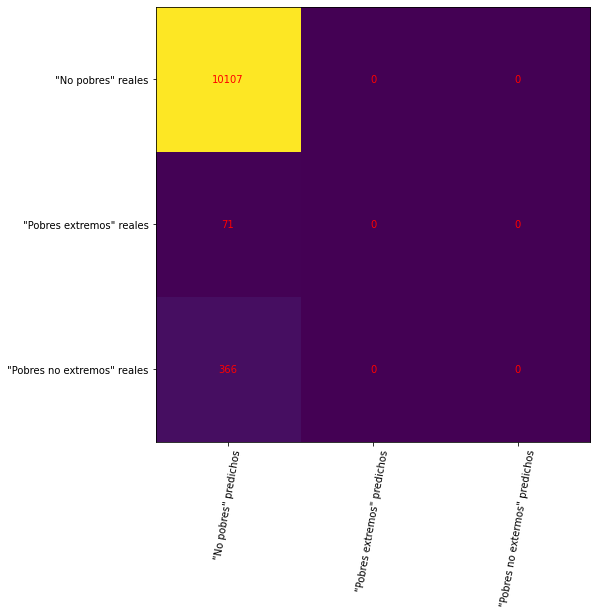

In [28]:
cm = confusion_matrix(Y_test, logReg.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Se puede apreciar que los valores que clasifica la regresión logística de forma correcta son los "No Pobres". Esto se debe a que, como la mayoría de los valores corresponden a esta categoría, entonces en el set de entrenamiento, la proporción entre esta categoría y las otras dos, es muy elevada. Esto se puede representar en el siguiente reporte de precisión del clasificador:

In [29]:
print(classification_report(Y_test, logReg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10107
           1       0.00      0.00      0.00        71
           2       0.00      0.00      0.00       366

    accuracy                           0.96     10544
   macro avg       0.32      0.33      0.33     10544
weighted avg       0.92      0.96      0.94     10544



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En conclusión, el modelo de Regresión Logística Multinomial posee aproximadamente un 96% de acierto. El 4% de fallos corresponde  a las malas clasificaciones realizadas sobre los tipos de pobreza: "Pobres extremos" y "Pobres no extremos",

<hr>

# Naïve Bayes multiclase gaussiano y multinomial
En la sección anterior, se pudo observar que el clasificador de Regresión Logística Multinomial arrojó buenos resultados, por lo que a continuación se decidió trabajar con el modelo de Naïve Bayes multiclase, que se supone debería ser más eficiente en su ejecución al realizar el supuesto de la probabilidad del teorema de bayes y arrojar un resultado similar al de la Regresión Logística Multinomial.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB 

In [31]:
df3 = pd.read_excel("CASEN2017_seleccionada_imputada_dummie.xlsx")
df3.head()

edad    ytot  esc  pobreza_int  sexo_Hombre  sexo_Mujer  ecivil_Anulado(a)  \
0    21  211091    7            0            0           1                  0   
1    24  281750   12            0            1           0                  0   
2    28  311750   12            0            1           0                  0   
3    26  341667   15            0            1           0                  0   
4    59  595000   12            0            0           1                  0   

   ecivil_Casado(a)  ecivil_Conviviente civil (con acuerdo de unión civil)  \
0                 0                                                  0       
1                 0                                                  0       
2                 0                                                  0       
3                 1                                                  0       
4                 0                                                  0       

   ecivil_Conviviente o pareja sin acuerdo de unión civil  ...  \
0                                                  0       ...   
1                                                  1       ...   
2                                                  1       ...   
3                                                  0       ...   
4                                                  0       ...   

   indsan_Sin Dato  calglobviv_Aceptable  calglobviv_Irrecuperable  \
0                0                     1                         0   
1                0                     1                         0   
2                0                     1                         0   
3                0                     0                         0   
4                0                     1                         0   

   calglobviv_Recuperable  calglobviv_Sin dato  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       1                    0   
4                       0                    0   

   hacinamiento_Hacinamiento crítico (5 y más)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   hacinamiento_Hacinamiento medio alto (3,5 a 4,9)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)  hacinamiento_NS/NR  \
0                                                  0                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

   hacinamiento_Sin hacinamiento (2,49 y menos)  
0                                             1  
1                                             1  
2                                             1  
3                                             1  
4                                             1  

[5 rows x 72 columns]

In [32]:
print("===================================================================")
print("COLUMNAS:")
print("===================================================================")
print(df3.columns)

COLUMNAS:
Index(['edad', 'ytot', 'esc', 'pobreza_int', 'sexo_Hombre', 'sexo_Mujer',
       'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente civil (con acuerdo de unión civil)',
       'ecivil_Conviviente o pareja sin acuerdo de unión civil',
       'ecivil_Divorciado (a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'o1_No', 'o1_Sí',
       'oficio1_Agricultores y trabajadores calificados agropecuarios y pesq',
       'oficio1_Empleados de oficina', 'oficio1_Fuerzas Armada',
       'oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo',
       'oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'oficio1_Operadores de instalaciones y máquinas y montadore',
       'oficio1_Profesionales, científicos e intelectuale', 'oficio1_Sin dato',
       'oficio1_Trabajadores de los servicios y vendedores de comerci',
       'oficio1_Trabajadores no calificado',
       'oficio1_Técnicos profesionales de nivel medi', 

Correlación de Perason para las características

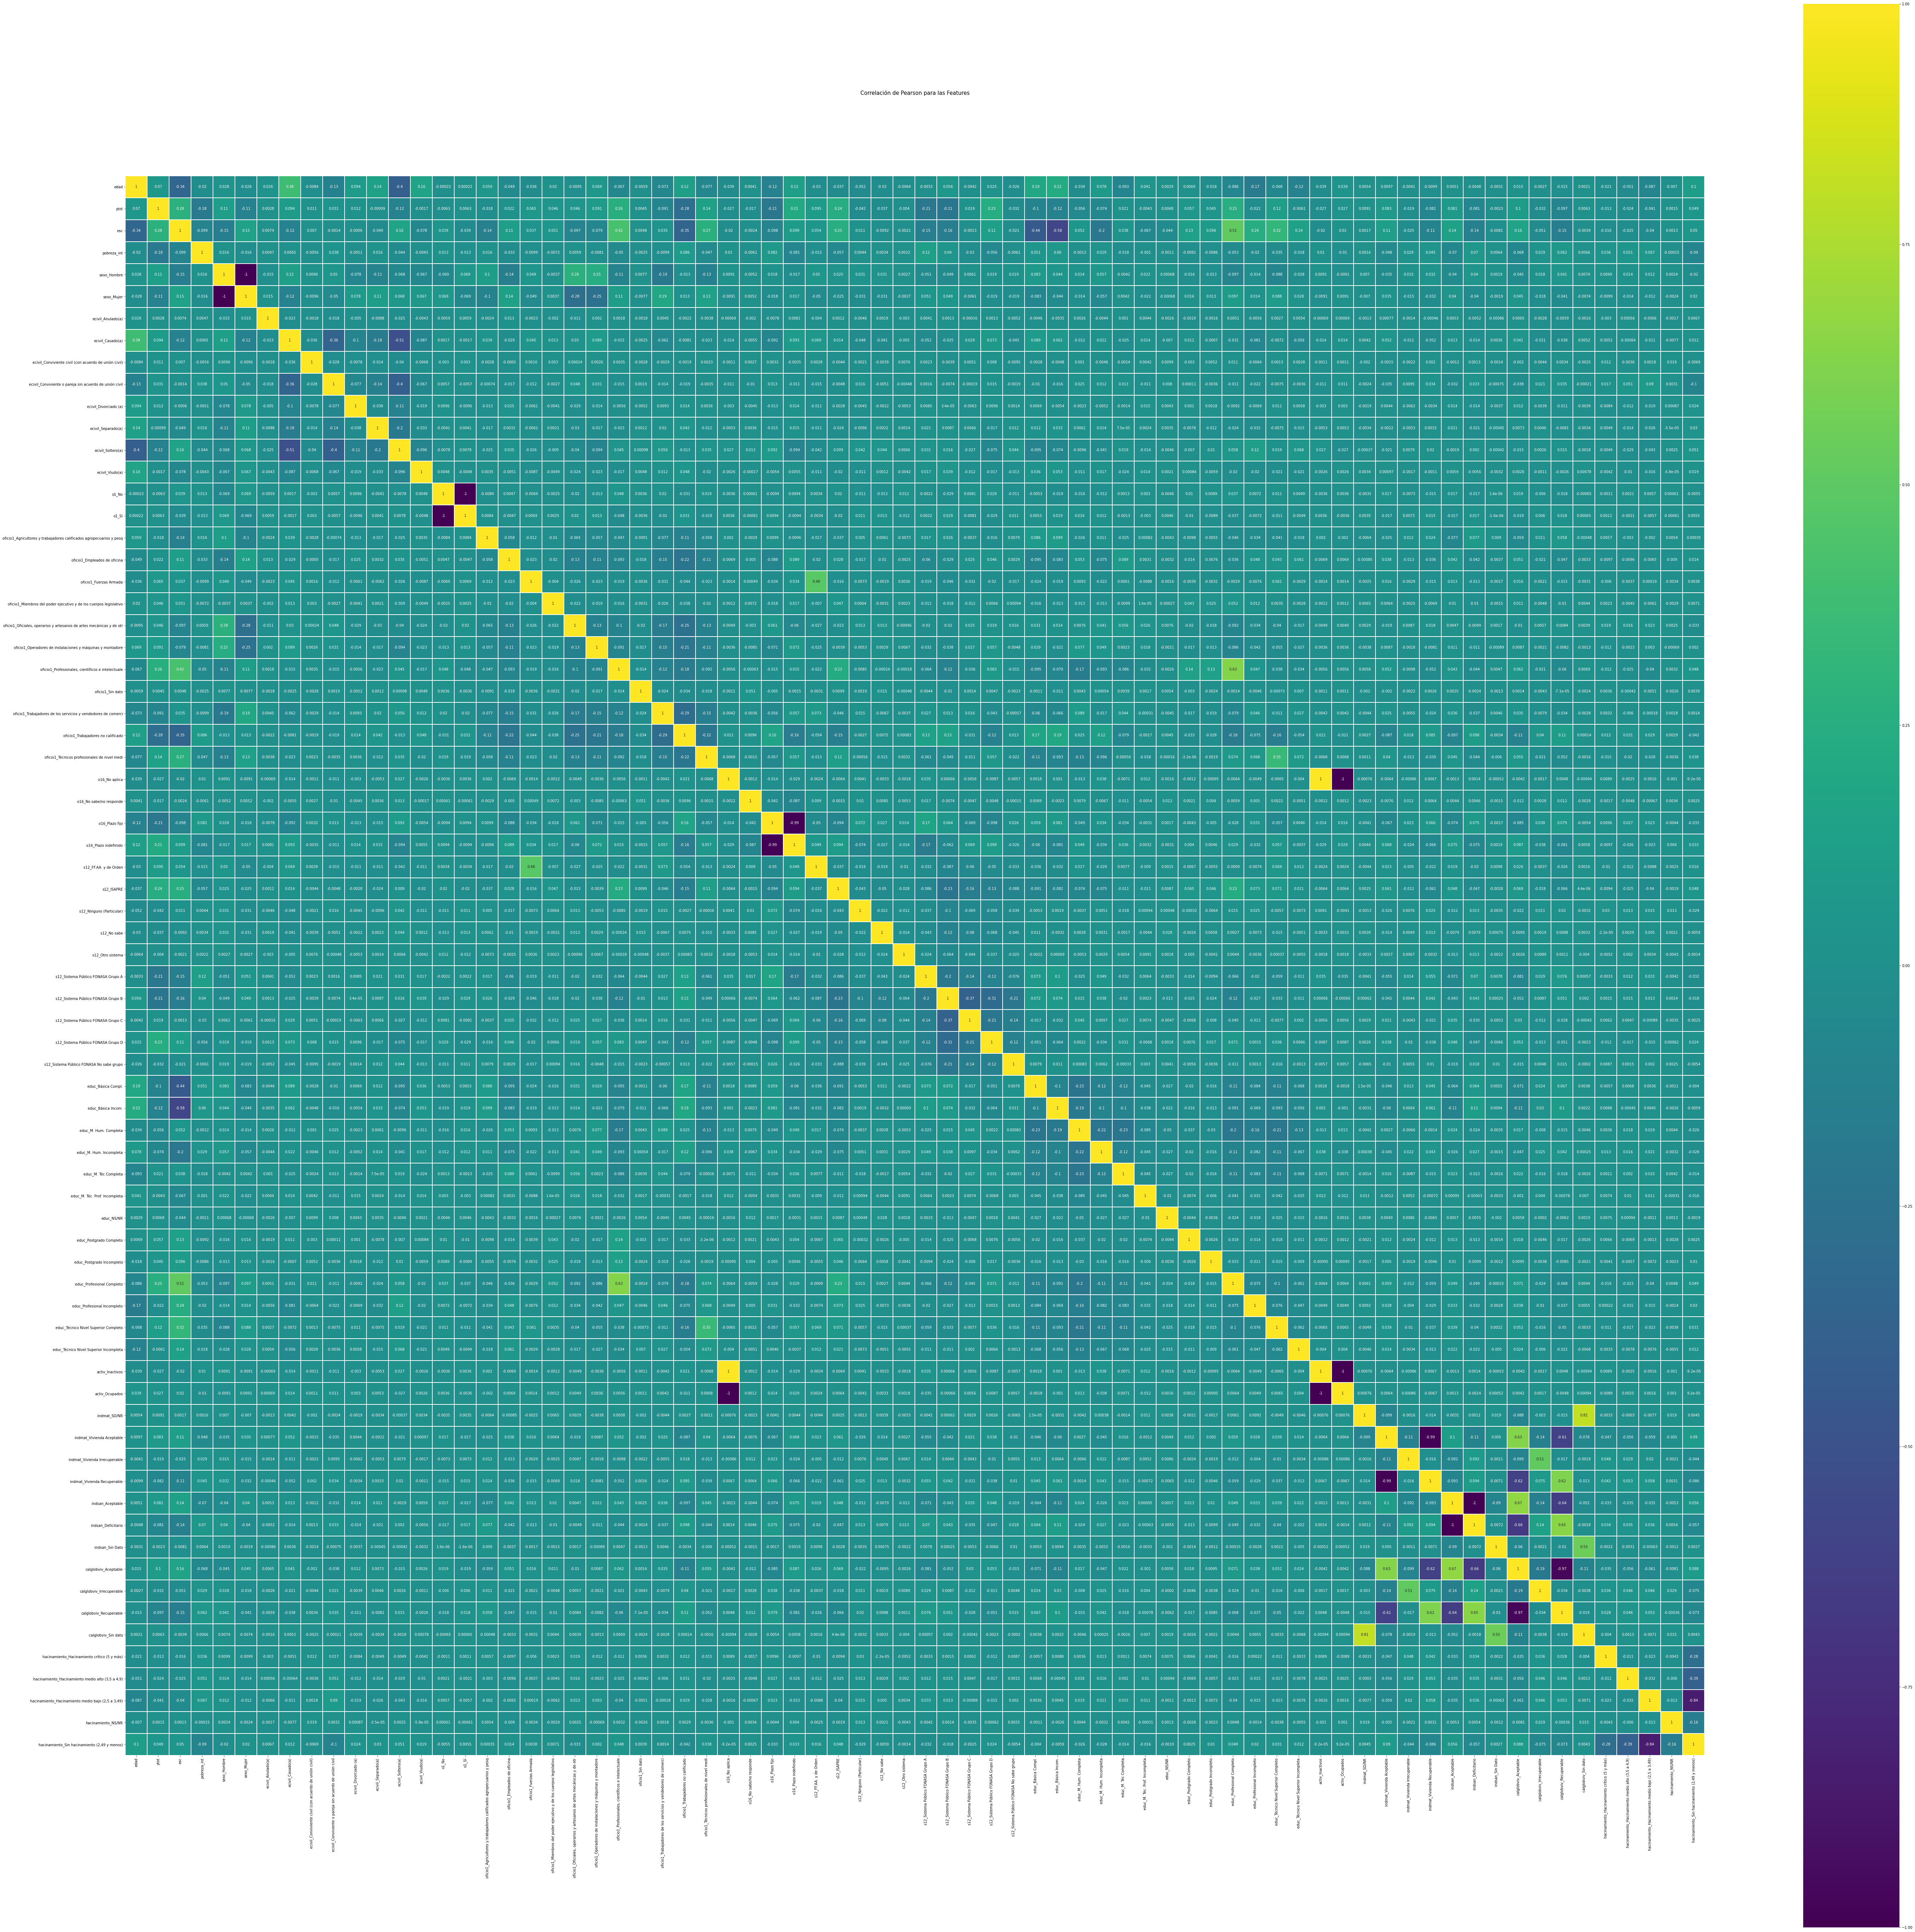

In [33]:
colormap = plt.cm.viridis
plt.figure(figsize=(100,100))
plt.title('Correlación de Pearson para las Features', y=1.05, size=15)
sb.heatmap(df3.astype(float).corr(), linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

La siguiente es una matriz de correlación interactiva, ya que permite hacer zoom sobre ésta al tener una gran cantidad de variables, no se puede visualizar con cierta claridad los valores y alta correlación y entre qué variables se está dando.

In [34]:
fig = px.imshow(df3.corr())
fig.update_layout(autosize=True, width=1000, height=1000)
fig.show()

Se revisan las secciones de la matriz de correlación en que haya mayor cantidad de variables que se expliquen mediante otras. Al deslizar el mouse sobre la matriz se puede apreciar una fuerte correlación entre las siguentes variables:
- activ_Inactivos vs o16_No aplica, 1
- calglobviv_Sin dato vs indmat_SD/NR, 0.8106682

Por lo que es conveniente eliminar de este data set las variables __activ_Inactivos__ y __calglobviv_Sin dato__ puesto que se explican en gran medida por otras variables

In [35]:
df3.columns

Index(['edad', 'ytot', 'esc', 'pobreza_int', 'sexo_Hombre', 'sexo_Mujer',
       'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente civil (con acuerdo de unión civil)',
       'ecivil_Conviviente o pareja sin acuerdo de unión civil',
       'ecivil_Divorciado (a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'o1_No', 'o1_Sí',
       'oficio1_Agricultores y trabajadores calificados agropecuarios y pesq',
       'oficio1_Empleados de oficina', 'oficio1_Fuerzas Armada',
       'oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo',
       'oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'oficio1_Operadores de instalaciones y máquinas y montadore',
       'oficio1_Profesionales, científicos e intelectuale', 'oficio1_Sin dato',
       'oficio1_Trabajadores de los servicios y vendedores de comerci',
       'oficio1_Trabajadores no calificado',
       'oficio1_Técnicos profesionales de nivel medi', 'o16_No ap

In [36]:
# Se crea una copia del dataset original y sobre éste se aplica la eliminacion de las columnas
df3_copia = df3.copy()
del df3_copia["activ_Inactivos"]
del df3_copia["calglobviv_Sin dato"]

In [37]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df3_copia.drop("pobreza_int", axis = 1) # variables independientes
Y = df3_copia["pobreza_int"]

In [38]:
# se divide la muestra de datos en un set de entreamiento y otro de prueba (80 - 20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print("===============================================================")
print("Tamaño de datos de entrenamiento: ")
print("X: ",X_train.shape)
print("Y: ",Y_train.shape)
print("===============================================================")
print("Tamaño de datos de testing: ")
print("X: ",X_test.shape)
print("T: ",Y_test.shape)
print("===============================================================")

Tamaño de datos de entrenamiento: 
X:  (42175, 69)
Y:  (42175,)
Tamaño de datos de testing: 
X:  (10544, 69)
T:  (10544,)


Clasificador bayesiano Gaussiano

In [39]:
gnb = GaussianNB()
gnb.fit(X_train.values, Y_train)
Y_pred_gnb = gnb.predict(X_test)
 
gnb_accuracy = accuracy_score(Y_test, Y_pred_gnb)
gnb_f1 = f1_score(Y_test, Y_pred_gnb, average='weighted')
print('Naïve Bayes Gaussiano (accuracy): ', (gnb_accuracy*100))
print('Naïve Bayes Gaussiano (f1-score): ', (gnb_f1*100))

Naïve Bayes Gaussiano (accuracy):  95.85546282245826
Naïve Bayes Gaussiano (f1-score):  93.82704592964852


In [40]:
# Se insertan los valores en las listas
List_f1.append(gnb_f1)
List_Accuracy.append(gnb_accuracy)
List_Models.append("Naïve Bayes Gaussiano")

Reporte de clasificador bayesiano gaussiano

In [41]:
print(classification_report(Y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10107
           1       0.00      0.00      0.00        71
           2       0.00      0.00      0.00       366

    accuracy                           0.96     10544
   macro avg       0.32      0.33      0.33     10544
weighted avg       0.92      0.96      0.94     10544



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Matriz de confusión de clasificador bayesiano gaussiano

In [42]:
confusion_matrix(Y_test, gnb.predict(X_test))

array([[10107,     0,     0],
       [   71,     0,     0],
       [  366,     0,     0]], dtype=int64)

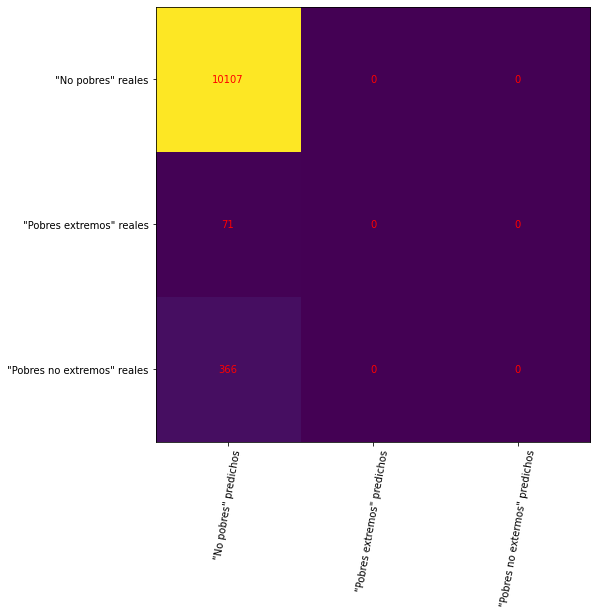

In [43]:
cm = confusion_matrix(Y_test, gnb.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Clasificador bayesiano multinomial

In [44]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
Y_pred_mnb = mnb.predict(X_test)

mnb_accuracy = accuracy_score(Y_test, Y_pred_mnb)
mnb_f1 = f1_score(Y_test, Y_pred_mnb, average='weighted')
print('Naïve Bayes Multinomial (accuracy): ', (mnb_accuracy*100))
print('Naïve Bayes Multinomial (f1-score): ', (mnb_f1*100))

Naïve Bayes Multinomial (accuracy):  73.103186646434
Naïve Bayes Multinomial (f1-score):  81.63323660527026


In [45]:
# Se insertan los valores en las listas
List_f1.append(mnb_f1)
List_Accuracy.append(mnb_accuracy)
List_Models.append("Naïve Bayes Multinomial")

Reporte de clasificador bayesiano multinomial

In [46]:
print(classification_report(Y_test, mnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     10107
           1       0.05      0.65      0.09        71
           2       0.06      0.29      0.10       366

    accuracy                           0.73     10544
   macro avg       0.36      0.56      0.34     10544
weighted avg       0.94      0.73      0.82     10544



Matriz de confusión de clasificador bayesiano multinomial

In [47]:
confusion_matrix(Y_test, mnb.predict(X_test))

array([[7555,  840, 1712],
       [  10,   46,   15],
       [ 157,  102,  107]], dtype=int64)

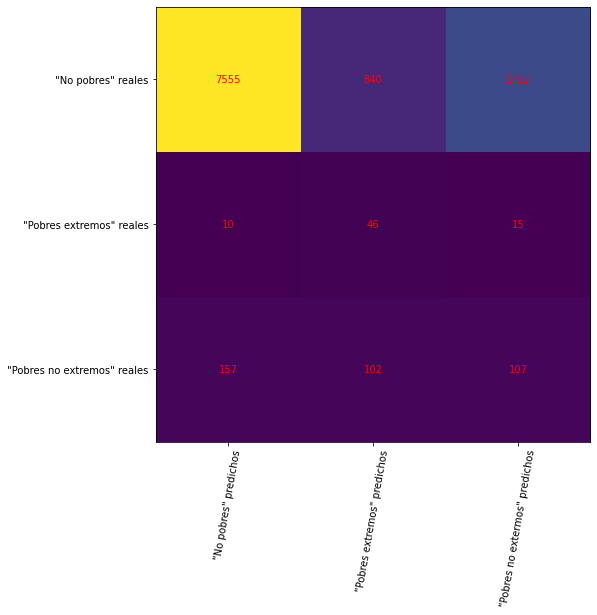

In [48]:
cm = confusion_matrix(Y_test, mnb.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Se puede apreciar cláramente como el clasificador bayesiano gaussiano posee un mayor porcentaje de acierto; pero el clasificador bayesiano multinomial arroja la particularidad de que clasifica los otros tipos de pobreza con cierta precisión; pero genera una buena cantidad de falsos positivos al observar con detalle la matriz de confusión. Esto se ve representado en que obtiene un menor % de acierto que el gaussiano. En resumen, el clasificador bayesiano gaussiano posee un 96% de precisión y el multinomial un 73%.

<hr>

# Árbol de decisión

Se decidió emplear el arbol de decisión, para observar los tiempos de ejecución al momento de crear el árbol, ya que la gran desventaja de este tipo de modelo es su ineficacia al momento de poseer un mayor número de variables dentro del modelo, y por consiguiente un mayor número de hojas resultantes.

In [49]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [50]:
df3 = pd.read_excel("CASEN2017_seleccionada_imputada_dummie.xlsx")
df3.head()

edad    ytot  esc  pobreza_int  sexo_Hombre  sexo_Mujer  ecivil_Anulado(a)  \
0    21  211091    7            0            0           1                  0   
1    24  281750   12            0            1           0                  0   
2    28  311750   12            0            1           0                  0   
3    26  341667   15            0            1           0                  0   
4    59  595000   12            0            0           1                  0   

   ecivil_Casado(a)  ecivil_Conviviente civil (con acuerdo de unión civil)  \
0                 0                                                  0       
1                 0                                                  0       
2                 0                                                  0       
3                 1                                                  0       
4                 0                                                  0       

   ecivil_Conviviente o pareja sin acuerdo de unión civil  ...  \
0                                                  0       ...   
1                                                  1       ...   
2                                                  1       ...   
3                                                  0       ...   
4                                                  0       ...   

   indsan_Sin Dato  calglobviv_Aceptable  calglobviv_Irrecuperable  \
0                0                     1                         0   
1                0                     1                         0   
2                0                     1                         0   
3                0                     0                         0   
4                0                     1                         0   

   calglobviv_Recuperable  calglobviv_Sin dato  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       1                    0   
4                       0                    0   

   hacinamiento_Hacinamiento crítico (5 y más)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   hacinamiento_Hacinamiento medio alto (3,5 a 4,9)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)  hacinamiento_NS/NR  \
0                                                  0                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

   hacinamiento_Sin hacinamiento (2,49 y menos)  
0                                             1  
1                                             1  
2                                             1  
3                                             1  
4                                             1  

[5 rows x 72 columns]

In [91]:
print("===================================================================")
print("COLUMNAS:")
print("===================================================================")
print(df3.columns)

COLUMNAS:
Index(['edad', 'ytot', 'esc', 'pobreza_int', 'sexo_Hombre', 'sexo_Mujer',
       'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente civil (con acuerdo de unión civil)',
       'ecivil_Conviviente o pareja sin acuerdo de unión civil',
       'ecivil_Divorciado (a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'o1_No', 'o1_Sí',
       'oficio1_Agricultores y trabajadores calificados agropecuarios y pesq',
       'oficio1_Empleados de oficina', 'oficio1_Fuerzas Armada',
       'oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo',
       'oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'oficio1_Operadores de instalaciones y máquinas y montadore',
       'oficio1_Profesionales, científicos e intelectuale', 'oficio1_Sin dato',
       'oficio1_Trabajadores de los servicios y vendedores de comerci',
       'oficio1_Trabajadores no calificado',
       'oficio1_Técnicos profesionales de nivel medi', 

In [39]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df3.drop("pobreza_int", axis = 1) # variables independientes
Y = df3["pobreza_int"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Aplicación del modelo

In [41]:
dtc = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
ydtc_predicted = dtc.predict(X_test)

dtc_accuracy = accuracy_score(Y_test, ydtc_predicted)
dtc_f1 = f1_score(Y_test, ydtc_predicted, average='weighted')
print('Arbol de decision (accuracy): ', (dtc_accuracy*100))
print('Arbol de decision (f1-score): ', (dtc_f1*100))

Arbol de decision (accuracy):  91.36949924127465
Arbol de decision (f1-score):  91.68130321157034


In [42]:
# Se insertan los valores en las listas
List_f1.append(dtc_f1)
List_Accuracy.append(dtc_accuracy)
List_Models.append("Arbol de decision")

Reporte de árbol de decisión

In [135]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10087
           1       0.06      0.06      0.06        77
           2       0.13      0.14      0.14       380

    accuracy                           0.92     10544
   macro avg       0.38      0.39      0.39     10544
weighted avg       0.93      0.92      0.92     10544



Matriz de confusión de árbol de decisión

In [136]:
confusion_matrix(Y_test, dtc.predict(X_test))

array([[9620,   85,  402],
       [  65,    2,    4],
       [ 351,    3,   12]], dtype=int64)

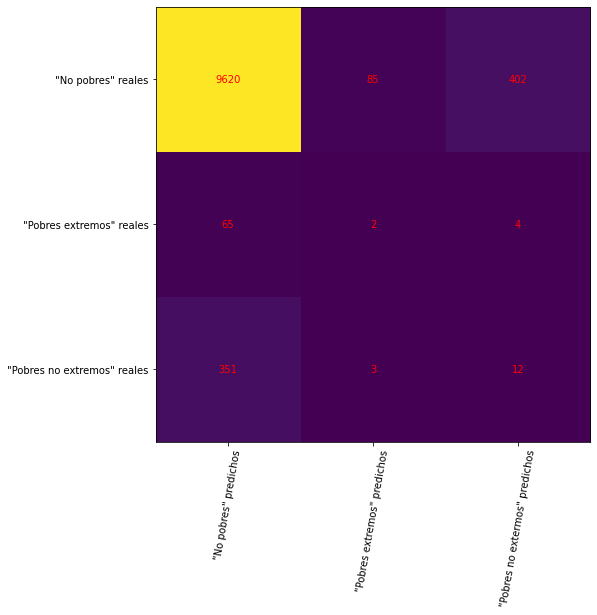

In [137]:
cm = confusion_matrix(Y_test, dtc.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

El árbol de decisión generado sin la optimización del alfa genera un coportamiento "similar" al del clasificador bayesiano multinomial, tiende a clasificar de mejor forma los tipos de pobreza "Pobres extremos" y "Pobres no extremos" (_véase matriz de confusión_). A diferencia del clasificador bayesiano multinomial, lo realiza con una mucha mayor precisión, ya que es de un 92% (comparada con el 73% del clasificador bayesiano). En este contexto, se puede apreciar que este árbol sin un alfa especificado, es más exacto que los modelos anteriores, dato no menor y que hay que considerar.

<hr>

## Optimización del árbol de decisión

Se aplica el ccp_alpha, para proporcionar un umbral de alfas efectivas. Este alfa es el costo de complejidad para un corte específico de un modo particular. A continuación se echa a andar el modelo y se calcula el costo de complejidad para la poda, posteriormente se grafican los resultados de esta poda.

In [43]:
path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

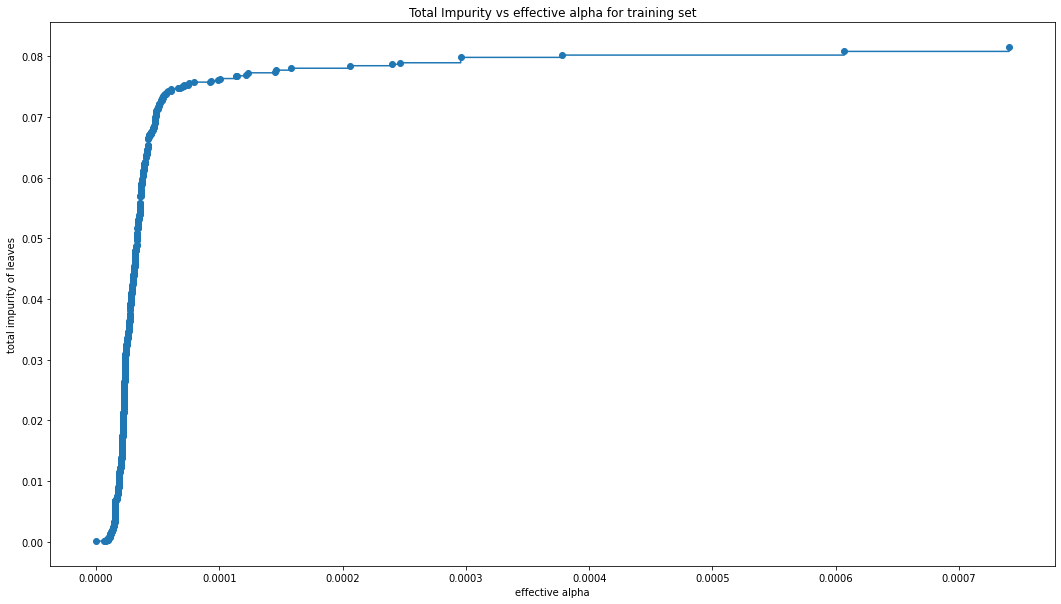

In [44]:
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Anteriormente se expone la cantidad de datos impuros para los diferentes alfas. Esto permite construir varios árboles con diferentes alfas. En base a esto, se puede estimar el número de nodos del último árbol y qué nivel de alfa es el que se puede llegar a tener.

_(La siguiente ejecución se demora bastante)_

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [46]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0023888000022918576 and a depth of: 0


In [47]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

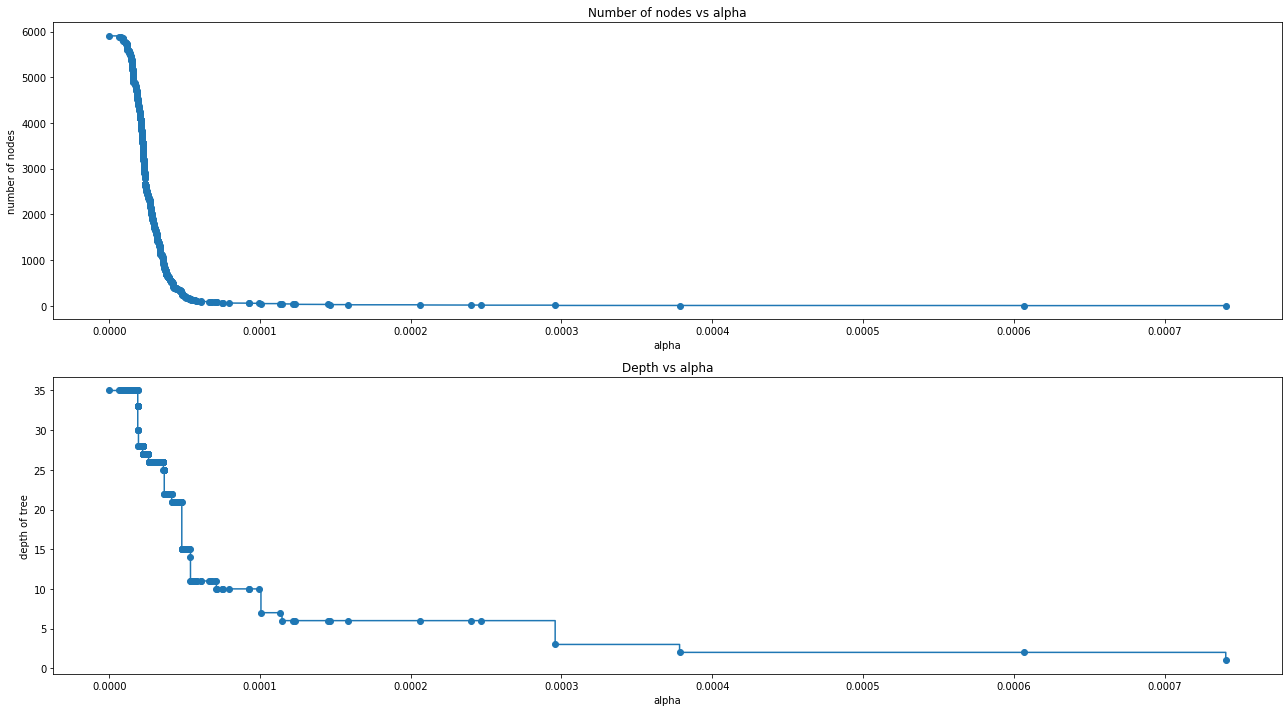

In [48]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(18,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

El primer gráfico obtiene las diferentes complejidades de tener cierto número de nodos. En el segundo gráfico se evalúa cuánta profundidad se le da al árbol.

<hr>

_(El siguiente gráfico se demora un poco en mostrarse)_

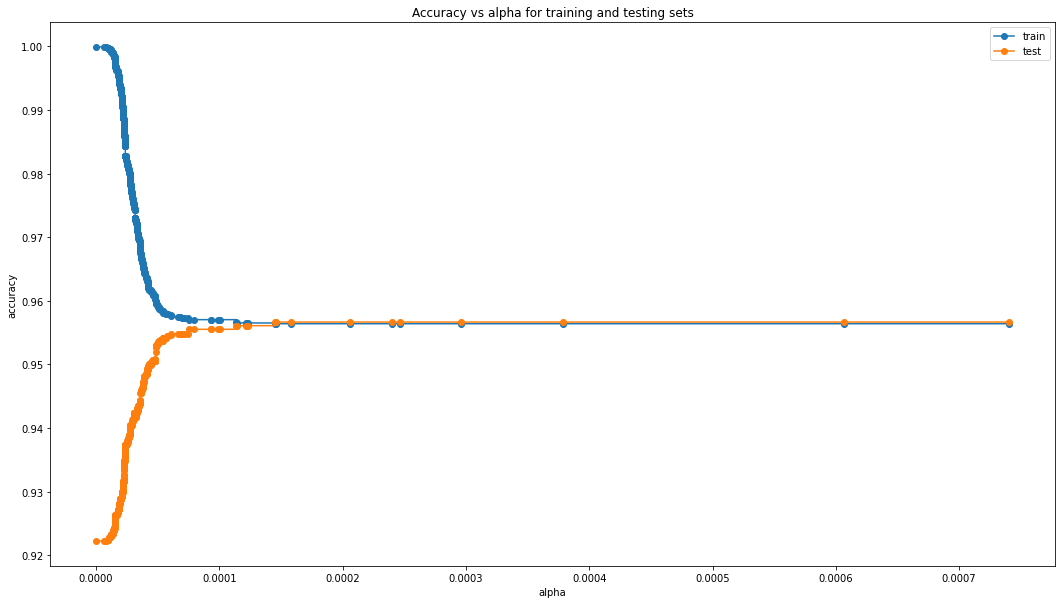

In [49]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

En este último gráfico, se expone cuánto se acierta dependiendo del alfa con el que se realice el corte y se defina.

<br>

Se crea el nuevo modelo de Árbol de Decisión con el alfa que le corresponde

In [50]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
best_model

DecisionTreeClassifier(ccp_alpha=0.00014513165543644617, random_state=1)

In [58]:
# Se crea el nuevo arbol de decision optimizado en funcin del alfa
dtc_optmize = best_model.fit(X_train,y_train)
ydtc_optmize_predicted = dtc_optmize2.predict(X_test)

dtc_optmize_accuracy = accuracy_score(Y_test, ydtc_optmize_predicted)
dtc_optmize_f1 = f1_score(Y_test, ydtc_optmize_predicted, average='weighted')
print('Arbol de decision optimizado (accuracy): ', (dtc_optmize_accuracy*100))
print('Arbol de decision optimizado (f1-score): ', (dtc_optmize_f1*100))

Arbol de decision optimizado (accuracy):  95.85546282245826
Arbol de decision optimizado (f1-score):  93.82704592964852


In [59]:
# Se insertan los valores en las listas
List_f1.append(dtc_optmize_f1)
List_Accuracy.append(dtc_optmize_accuracy)
List_Models.append("Arbol de decision optimizado")

Reporte de árbol de decisión optimizado

In [130]:
print(classification_report(y_test, dtc_optmize.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10087
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00       380

    accuracy                           0.96     10544
   macro avg       0.32      0.33      0.33     10544
weighted avg       0.92      0.96      0.94     10544



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Matriz de confusión del árbol de decisión optimizado

In [131]:
confusion_matrix(Y_test, dtc_optmize.predict(X_test))

array([[10107,     0,     0],
       [   71,     0,     0],
       [  366,     0,     0]], dtype=int64)

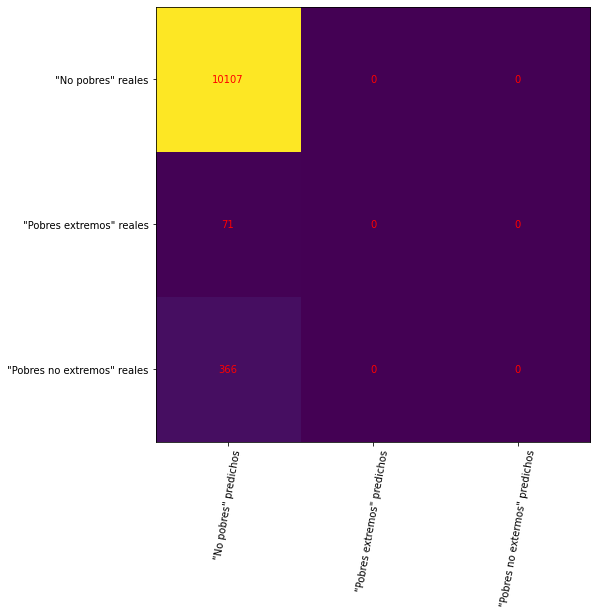

In [133]:
cm = confusion_matrix(Y_test, dtc_optmize.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Se puede apreciar que los resultados son muy similares a los de una regresión logísica. Tiende a clasificar de forma acertada la categoría de "No pobres", pero las demás las clasifica bajo esa misma categoría siendo que no pertenecen. Se puede apreciar que, efectivamente el tiempo de procesamiento del modelo es mayor comparado a los anteriores, teniendo en cuenta que la cantidad de variables no era tan grande, esto puede generar un cierto "cuello de botella" para este tipo de modelo. <br>
Se puede decir que, este árbol de clasificación es más preciso; pero sólo con la categoría de "No pobres", la cual clasifica de forma casi ideal; pero las otras categorías no aplica de la misma forma.

<hr>

# SVC Multiclase


In [63]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import svm, metrics
from sklearn.svm import SVC

In [64]:
df3 = pd.read_excel("CASEN2017_seleccionada_imputada_dummie.xlsx")
df3.head()

edad    ytot  esc  pobreza_int  sexo_Hombre  sexo_Mujer  ecivil_Anulado(a)  \
0    21  211091    7            0            0           1                  0   
1    24  281750   12            0            1           0                  0   
2    28  311750   12            0            1           0                  0   
3    26  341667   15            0            1           0                  0   
4    59  595000   12            0            0           1                  0   

   ecivil_Casado(a)  ecivil_Conviviente civil (con acuerdo de unión civil)  \
0                 0                                                  0       
1                 0                                                  0       
2                 0                                                  0       
3                 1                                                  0       
4                 0                                                  0       

   ecivil_Conviviente o pareja sin acuerdo de unión civil  ...  \
0                                                  0       ...   
1                                                  1       ...   
2                                                  1       ...   
3                                                  0       ...   
4                                                  0       ...   

   indsan_Sin Dato  calglobviv_Aceptable  calglobviv_Irrecuperable  \
0                0                     1                         0   
1                0                     1                         0   
2                0                     1                         0   
3                0                     0                         0   
4                0                     1                         0   

   calglobviv_Recuperable  calglobviv_Sin dato  \
0                       0                    0   
1                       0                    0   
2                       0                    0   
3                       1                    0   
4                       0                    0   

   hacinamiento_Hacinamiento crítico (5 y más)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   hacinamiento_Hacinamiento medio alto (3,5 a 4,9)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)  hacinamiento_NS/NR  \
0                                                  0                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

   hacinamiento_Sin hacinamiento (2,49 y menos)  
0                                             1  
1                                             1  
2                                             1  
3                                             1  
4                                             1  

[5 rows x 72 columns]

In [65]:
print("===================================================================")
print("COLUMNAS:")
print("===================================================================")
print(df3.columns)

COLUMNAS:
Index(['edad', 'ytot', 'esc', 'pobreza_int', 'sexo_Hombre', 'sexo_Mujer',
       'ecivil_Anulado(a)', 'ecivil_Casado(a)',
       'ecivil_Conviviente civil (con acuerdo de unión civil)',
       'ecivil_Conviviente o pareja sin acuerdo de unión civil',
       'ecivil_Divorciado (a)', 'ecivil_Separado(a)', 'ecivil_Soltero(a)',
       'ecivil_Viudo(a)', 'o1_No', 'o1_Sí',
       'oficio1_Agricultores y trabajadores calificados agropecuarios y pesq',
       'oficio1_Empleados de oficina', 'oficio1_Fuerzas Armada',
       'oficio1_Miembros del poder ejecutivo y de los cuerpos legislativo',
       'oficio1_Oficiales, operarios y artesanos de artes mecánicas y de otr',
       'oficio1_Operadores de instalaciones y máquinas y montadore',
       'oficio1_Profesionales, científicos e intelectuale', 'oficio1_Sin dato',
       'oficio1_Trabajadores de los servicios y vendedores de comerci',
       'oficio1_Trabajadores no calificado',
       'oficio1_Técnicos profesionales de nivel medi', 

In [66]:
# Se copian las variables independientes a X (todas menos pobreza) y la dependiente a Y (pobreza)
X = df3.drop("pobreza_int", axis = 1) # variables independientes
Y = df3["pobreza_int"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Se crean los SVC para los kernel:
- RBF
- Polinómico
- Sigmoide

_(La siguiente ejecución se toma bastante tiempo)_

In [68]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)# K. RBF 
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)# K. Polinomial
sigmoide = svm.SVC(kernel="sigmoid").fit(X_train, y_train)# K. Sigmoide 

_(La siguiente ejecución se toma bastante tiempo)_

In [69]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sigm_pred = sigmoide.predict(X_test)

In [70]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polinomial): ', (poly_accuracy*100))
print('F1 (Polinomial): ', (poly_f1*100))

Accuracy (Polinomial):  95.66578148710167
F1 (Polinomial):  93.5466761533997


In [71]:
# Se insertan los valores en las listas
List_f1.append(poly_f1)
List_Accuracy.append(poly_accuracy)
List_Models.append("SVM Polinomial")

Reporte de SVC polinomial

In [76]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10087
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00       380

    accuracy                           0.96     10544
   macro avg       0.32      0.33      0.33     10544
weighted avg       0.92      0.96      0.94     10544



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusión de SVC polinomial

In [77]:
confusion_matrix(Y_test, poly_pred)

array([[10107,     0,     0],
       [   71,     0,     0],
       [  366,     0,     0]], dtype=int64)

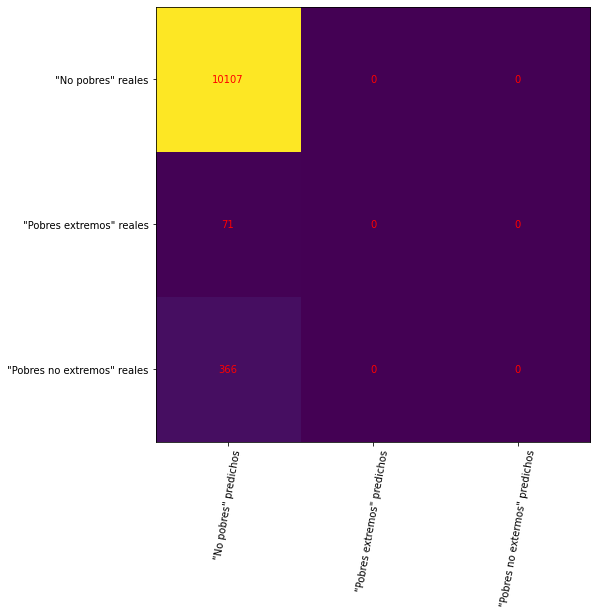

In [78]:
cm = confusion_matrix(Y_test, poly_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Se puede apreciar que los resultados son muy similares a los de una regresión logística multinomial, presenta la dificultad de clasificar aquellas categorías de pobreza que son de tipo "Pbres extremos" y "Pobres no extremos".

In [72]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF): ', (rbf_accuracy*100))
print('F1 (RBF): ', (rbf_f1*100))

Accuracy (RBF):  95.66578148710167
F1 (RBF):  93.5466761533997


In [73]:
# Se insertan los valores en las listas
List_f1.append(rbf_f1)
List_Accuracy.append(rbf_accuracy)
List_Models.append("SVM RBF")

Reporte de SVC RBF

In [79]:
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10087
           1       0.00      0.00      0.00        77
           2       0.00      0.00      0.00       380

    accuracy                           0.96     10544
   macro avg       0.32      0.33      0.33     10544
weighted avg       0.92      0.96      0.94     10544



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusión de SVC RBF

In [80]:
confusion_matrix(Y_test, rbf_pred)

array([[10107,     0,     0],
       [   71,     0,     0],
       [  366,     0,     0]], dtype=int64)

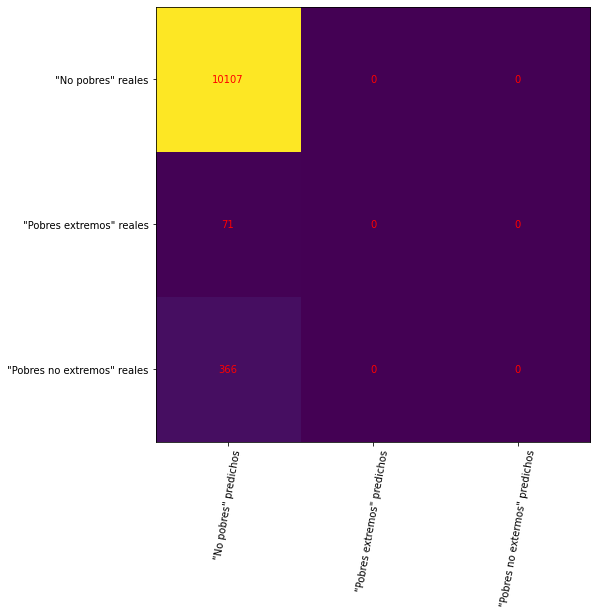

In [81]:
cm = confusion_matrix(Y_test, rbf_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

Se comporta exactamente igual que el SVC polinomial.

In [74]:
sigm_accuracy = accuracy_score(y_test, sigm_pred)
sigm_f1 = f1_score(y_test, sigm_pred, average='weighted')
print('Accuracy (RBF): ', (sigm_accuracy*100))
print('F1 (RBF): ', (sigm_f1*100))

Accuracy (RBF):  95.41919575113809
F1 (RBF):  93.44138399627728


In [75]:
# Se insertan los valores en las listas
List_f1.append(sigm_f1)
List_Accuracy.append(sigm_accuracy)
List_Models.append("SVM Sigma")

Reporte de SVC sigmoide

In [154]:
print(classification_report(y_test, sigm_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10087
           1       0.03      0.01      0.02        77
           2       0.00      0.00      0.00       380

    accuracy                           0.95     10544
   macro avg       0.33      0.34      0.33     10544
weighted avg       0.92      0.95      0.93     10544



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Matriz de confusión de SVC sigmoide

In [155]:
confusion_matrix(Y_test, sigm_pred)

array([[10081,    26,     0],
       [   71,     0,     0],
       [  363,     3,     0]], dtype=int64)

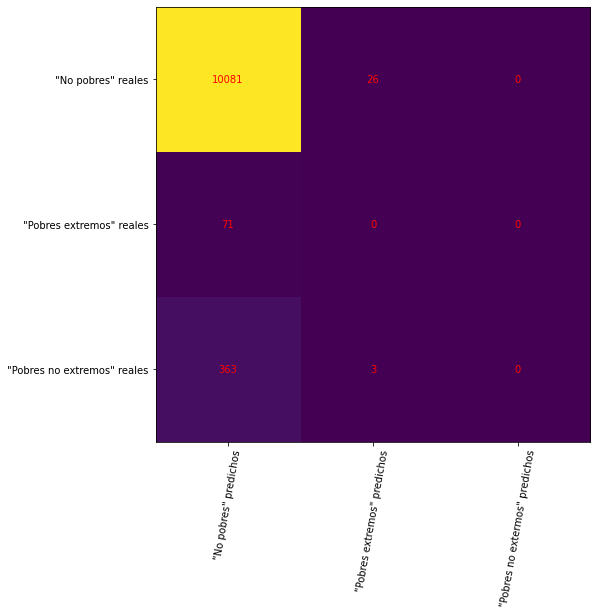

In [156]:
cm = confusion_matrix(Y_test, sigm_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" predichos', '"Pobres extremos" predichos', '"Pobres no extermos" predichos'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('"No pobres" reales', '"Pobres extremos" reales', '"Pobres no extremos" reales'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xticks(rotation = 80)
plt.show()

El SVC Sigma tiene un menor porcentaje de precisión y además tiende a clasificar de forma errónea la categoría de "Pobres extremos".

<hr>

# Conclusiones

In [85]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [115]:
# Se crea un dataframe con los resultados de cada modelo
df_results = pd.DataFrame({
        'Model': List_Models,
        'Accuracy': List_Accuracy,
        'F1-score': List_f1
    })

df_results

Model  Accuracy  F1-score
0  Multinomial Logistic Regresion  0.958555  0.938270
1           Naïve Bayes Gaussiano  0.958555  0.938270
2         Naïve Bayes Multinomial  0.731316  0.816523
3               Arbol de decision  0.913695  0.916813
4    Arbol de decision optimizado  0.958555  0.938270
5                  SVM Polinomial  0.956658  0.935467
6                         SVM RBF  0.956658  0.935467
7                       SVM Sigma  0.954192  0.934414

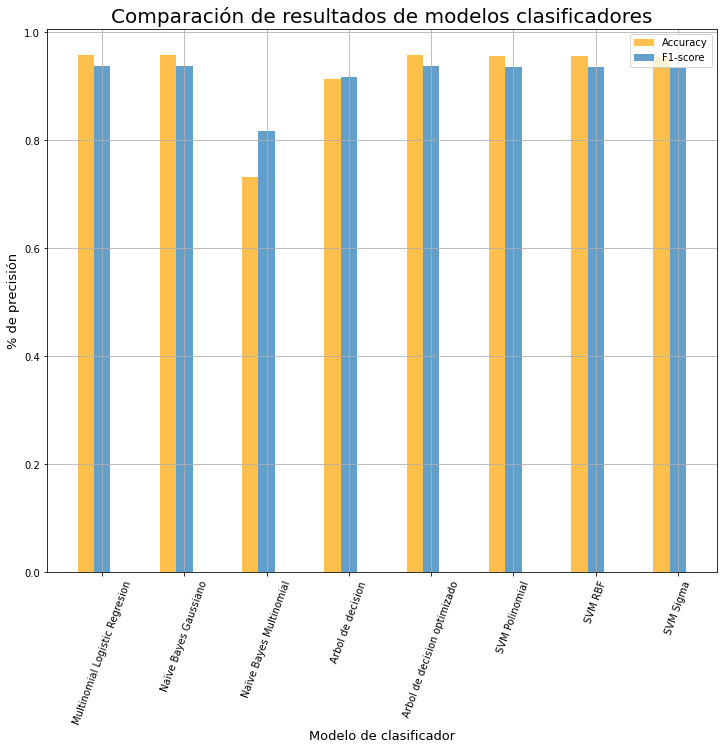

In [137]:
# Gráfico de barras pareado
tcks = df_results.index
tcks_mayor = df_results.index
plt.figure(figsize=(12,10))
plt.bar(tcks-0.2, df_results['Accuracy'], color='orange', label='Accuracy', width=0.2, align='center', alpha=0.7)
plt.bar(tcks_mayor, df_results['F1-score'], label='F1-score', width=0.2, align='center', alpha=0.7)
plt.grid()
plt.xticks(tcks, labels = df_results['Model'], rotation=70)
plt.xlabel('Modelo de clasificador', fontsize = 13)
plt.ylabel('% de precisión', fontsize = 13)
plt.title('Comparación de resultados de modelos clasificadores', fontsize = 20)
plt.legend(loc='best')
plt.show()

De acuerdo a lo observado, los modelos en su mayoría tienden a clasificar de la misma manera y con los mismos porcentajes resultantes, los cuales van entorno al 96% de precisión. Todos tienen en común la dificultad de clasificar de forma errónea las categorías de pobreza de tipo "Pobreza extrema" y "Pobreza no extrema". <br>
El clasificador de regresión logística, naïve bayes gaussiano y el arbol de decisión optimizado clasifican de la misma manera y por ende tienen la misma matriz de confusión. Los clasificadores de más bajo rendimiento fueron los SVC, donde el polinomial y el rbf tuvieron el mismo resultado y el sigmoide fue el peor. El clasificador menos preciso fue el näive bayes multinomial. Cabe mencionar que, el primer árbol de decisión a pesar de no estar optimizado, fue él único capaz de clasificar correctamente un cierto número de registros de las categorías de "Pobreza extrema" y "Pobreza no extrema", junto con el clasificador de naïve bayes multinomial. <br>
Como conclusión, se puede apreciar que los modelos en general poseen un buen grado de precisión, que se puede mejorar si la fuente de información tuviese un mayor número de registros de las categorías de pobreza que fueron mal clasificadas. Particularmente, ocurrió lo que se esperaba en cuanto a los tiempos de ejecución para los modelos de árboles de decisión y SVC, los cuales fueron de varios minutos en algunos casos. Esta característica hay que tomarla en cuenta, ya que el número de variables no era áltamente significativo (poco más de 70 variables). 